# Projet d'économétrie : le modèle création-destruction d' Aghion et d'Howitt


### **<span style='color:blue'>Fait par E. Todosijevic et Cherine Rhellab</span>**

## Introduction

Le modèle d'Aghion et Howitt constitue une approche de croissance économique basée sur le processus schumpétérien de création et destruction. Selon ce modèle, la croissance économique est exclusivement permise par le progrès technique, résultant de la compétition entre les entreprises engagées dans la recherche et l'innovation.

Chaque innovation se traduit par un nouveau bien intermédiaire qui permet une production plus efficace que ce qui etait permis auparavant. Les firmes qui font de la recherche sont motivées par la possibilité de générer une rente de monopole si la recherche est brevetée. Ces rentes seront à leur tour détruites par une autre innovation.

Dans le cadre de ce modèle, à chaque période un ou une entrepreneur a l’opportunité de mener un projet de recherche pour innover. La probabilité de succès à chaque période est alors notée :

$$\mu_t = \lambda \left( \frac{R}{\gamma A_{t-1}} \right)^{\sigma}$$

avec $R$ les dépenses de R&D et $A_{t-1}$ la productivité totale des facteurs à la période précédente

Quand le projet de recherche réussi, il donne lieu à une innovation drastique: le nouveau bien intermédiaire résultant de cette innovation remplace l'ancien. (Exemple : télévisions noire et blanc VS télévision en couleur).

Dans cette dynamique, les emplois associés à la production de l'ancien bien intermédiaire peuvent être affectés de manière négative, voire supprimés, car l'innovation rend l'ancienne technologie obsolète. Cependant, parallèlement à cette destruction d'emplois, l'innovation ouvre la voie à la création de nouveaux emplois dans les secteurs liés à la production du nouveau bien intermédiaire.

Partant de cette idée, nous voulons voir comment cette théorie fonctionne dans la réalité en utilisant des données concrètes.
Pour cela, nous allons utiliser 3 séries temporelles :

Le **chômage** aux Etats-Unis entre 1970 et 2021, permettant de rendre compte de la potentielle création ou destruction d'emploi, qui serait-elle même expliquée par :

Les **dépenses de R&D** aux Etats-Unis entre 1970 et 2021, qui participent à augmenter la probabilité d'innovation et donc de destruction d'emploi, mais aussi,

La **productivité du travail** aux Etats-Unis entre 1970 et 2021, qui participe à diminuer la probabilité d'innovation de la période suivante.

# Partie 1 : Modélisation univariée

## I-  Importation et visualisation des données

Pour commencer, nous allons charger les packages dont nous avons besoin pour réaliser ce projet. *Attention car ça risque de prendre du temps..*

In [ ]:
install.packages("readxl")
install.packages("ggplot2")
install.packages("urca")
install.packages("FinTS")
install.packages("forecast")
install.packages("reshape2")
install.packages("lmtest")
install.packages("moments")
install.packages("tseries")
install.packages("Metrics")
install.packages("vars")
install.packages("lpirfs")
install.packages("melt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/lo

In [ ]:
library("readxl")
library("ggplot2")
library("stats")
library("urca")
library("FinTS")
library("forecast")
library("reshape2")
library("lmtest")
library("moments")
library("tseries")
library("Metrics")
library("lmtest")

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:FinTS’:

    Acf



Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




Maintenant, il convient d'importer la base de données, qui se trouve dans un fichier Excel et l'affecter à "Base". Ici, on importe directement le fichier dans le Google Collab.

*Attention, dans la légende, il est écrit que le chômage et les dépenses de R&D sont en %, ce qui ne sera pas le cas dans notre data frame.*

In [ ]:
Base <- read_excel("BaseDonnées.xlsx",sheet = "Jointure des bases de données")

Afin de mieux visualiser notre base de données, nous allons la convertir en un data frame.

In [ ]:
Base <- as.data.frame(Base)

On décomposes notre data frame pour avoir un data frame par série temporelle.

In [ ]:
chômage = Base$`Chômage aux Etats-Unis (en % du PIB, moyenne du chômage trimestriel)`
dépenses = Base$`Dépenses en R&D (en % du PIB) des Etats Unis`
productivité <- Base$`Productivité du travail (PIB par heure travaillée) des Etats Unis`

data_chômage <- data.frame(dates = Base$Dates,chômage)

data_dépenses <- data.frame(dates = Base$Dates,dépenses)

data_productivité <- data.frame(dates = Base$Dates,productivité)

## II - Représentations graphiques, autocorrélogrammes simples et autocorrélogrammes partiels par séries

### 1. Le chômage aux Etats-Unis entre 1970 et 2021

<span style="color:black;"><ins>Etape préliminaire</ins> : transformation des données en log pour donner davantage d'importance aux faibles variations et pour réduire l'hétéroscédasticité. </span>

In [ ]:
chômage$logPIB <- log(chômage)

Warning message in chômage$logPIB <- log(chômage):
“Coercing LHS to a list”


Création d'un data frame avec le chômage et les dates pour faciliter la construction du graphique.

In [ ]:
data_chômagelog <- data.frame(dates = Base$Dates,chômage$logPIB)

### 1.1 Représentation graphique

<ins>Etape préliminaire</ins> : ajustement de la taille des graphiques

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 8)

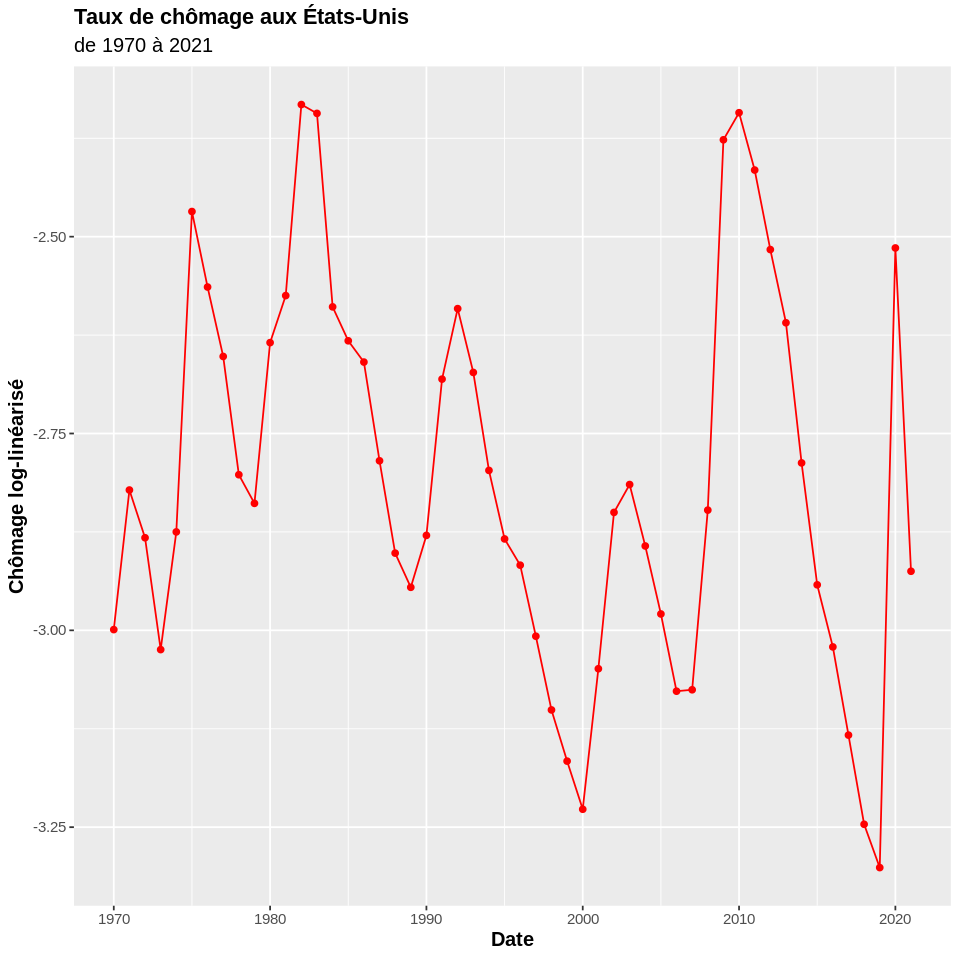

In [ ]:
p_chomage <- ggplot(data = data_chômagelog, aes(x = dates, y = chômage$logPIB)) +
  geom_point(color = 'red') +
  geom_line(color = 'red') +
  xlab('Date') +
  ylab('Taux de chômage') +
  labs(y = "Chômage log-linéarisé", title = "Taux de chômage aux États-Unis", subtitle = "de 1970 à 2021") +
  theme(
    plot.title = element_text(size = 13, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text = element_text(size = 9),
    axis.title = element_text(size = 12, face = "bold")
  )

print(p_chomage)


**<ins>Commentaire<ins>** :

Le taux de chômage aux Etats-Unis connait des fortes fluctuations sur la période estimée. De manière plus précise, le chômage évolue de manière cyclique : il atteint des niveaux relativement hauts pendant les périodes de crises économiques (1973 - choc pétrolier, 2000 - bulle internet, 2008 - Subprimes et 2020 - COVID19) puis redescend en période de reprise et de croissance.
    
Par exemple, pendant la crise de 2008, les entreprises, confrontées à des conditions économiques difficiles, ont réagi en réduisant leurs effectifs pour faire face à la baisse de la demande et à l'incertitude financière.Le secteur financier a été particulièrement touché, avec des faillites bancaires et des pertes massives, entraînant des suppressions d'emplois dans ce secteur.
    
A première vue, la moyenne de la série semble constante au fil du temps, cela suggère une stationnarité en moyenne. Néanmoins les fluctuations de la série connaissent des amplitudes différentes ce qui suggère une non-stationnarité en variance.

Par conséquent, il est difficile de se prononcer sur la stationnarité de la série.

### 1.2 Autocorrélogramme simple

Afin de réussir à faire un autocorrélogramme, on converti la liste "chômage" en un vecteur numérique puis en un objet de type série temporelle.

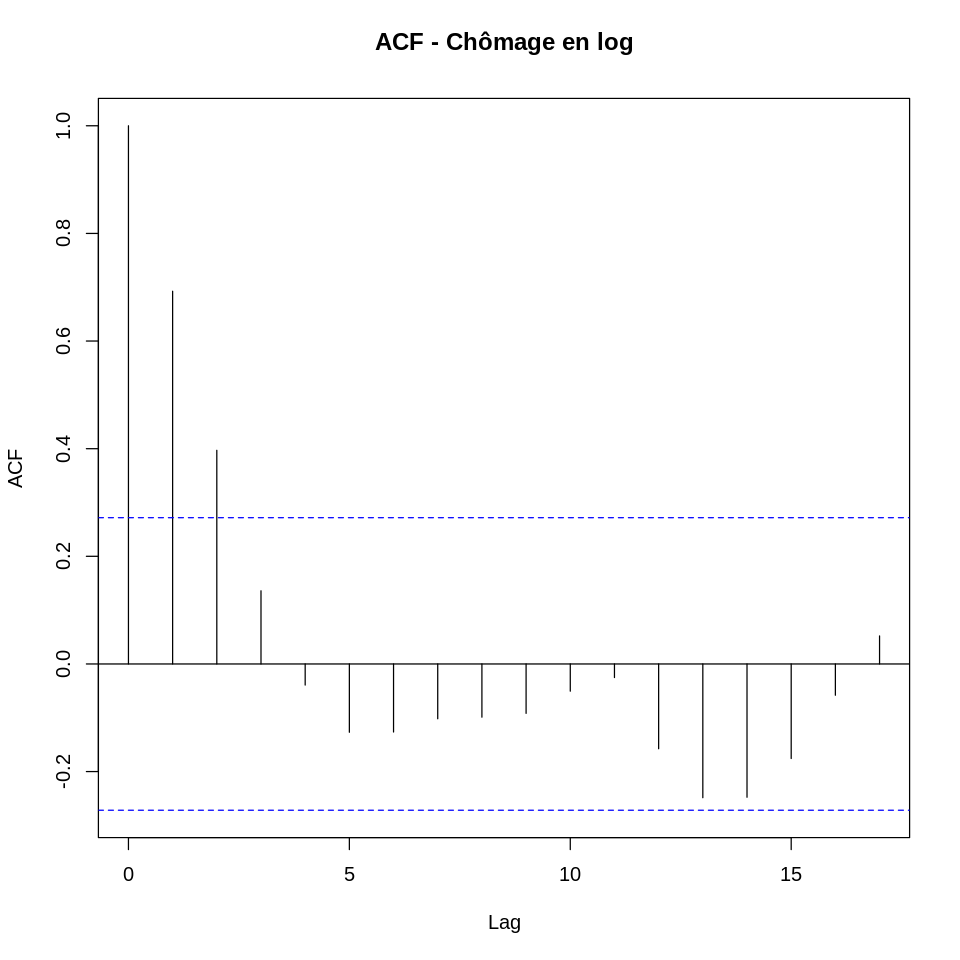

In [ ]:
acf_chômage <- acf(data_chômagelog$chômage, main = "ACF - Chômage en log")

<span style="color:blue;">**<ins>Commentaire<ins>** : Les autocorrélations sont significatives et décroissantes jusqu'au retard 2. Autrement dit, ce qui s'est passé au cours des deux dernières années a un impact significatif statistiquement sur ce que nous observons cette année. </span>

###  1.3 Autocorrélogramme partiel

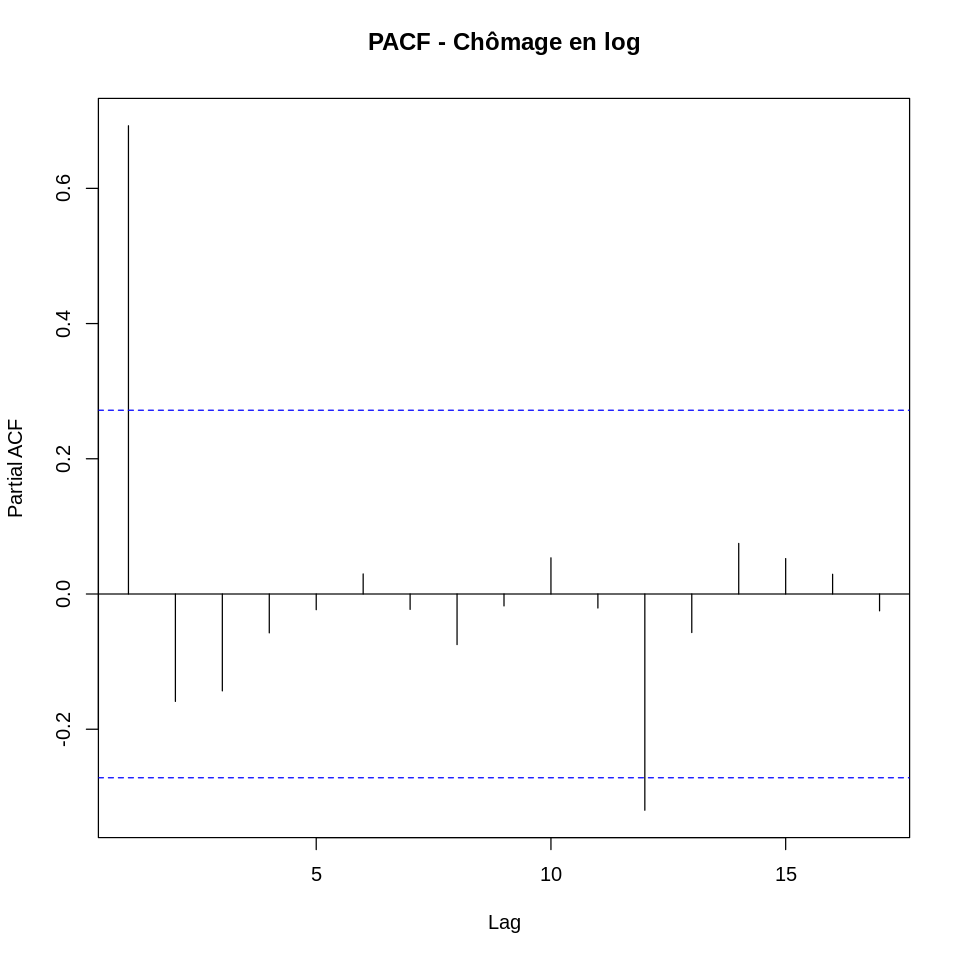

In [ ]:
pacf_chômage <- pacf(data_chômagelog$chômage, main = "PACF - Chômage en log")

<span style="color:blue;">**<ins>Commentaire<ins>** : L'autocorrélation partielle devient non significative à partir du second retard. </span>

<span style="color:red;">**<ins>Commentaire<ins>** : Au total, le profil des autocorrélations du chômage semblent montrer un processus ARMA(1,3)
 </span>

 ### 2. Les dépenses de R&D aux Etats-Unis de 1970 à 2021

<ins>Etape préliminaire</ins> : transformation des données en log pour donner davantage d'importance aux faibles variations et pour

In [ ]:
dépenses$logPIB <- log(dépenses)

Warning message in dépenses$logPIB <- log(dépenses):
“Coercing LHS to a list”


Création d'un data frame avec les dépenses de R&D et les dates pour faciliter la construction du graphique.

In [ ]:
data_dépenseslog <- data.frame(dates = Base$Dates,dépenses$logPIB)

### 2.1 Représentation graphique

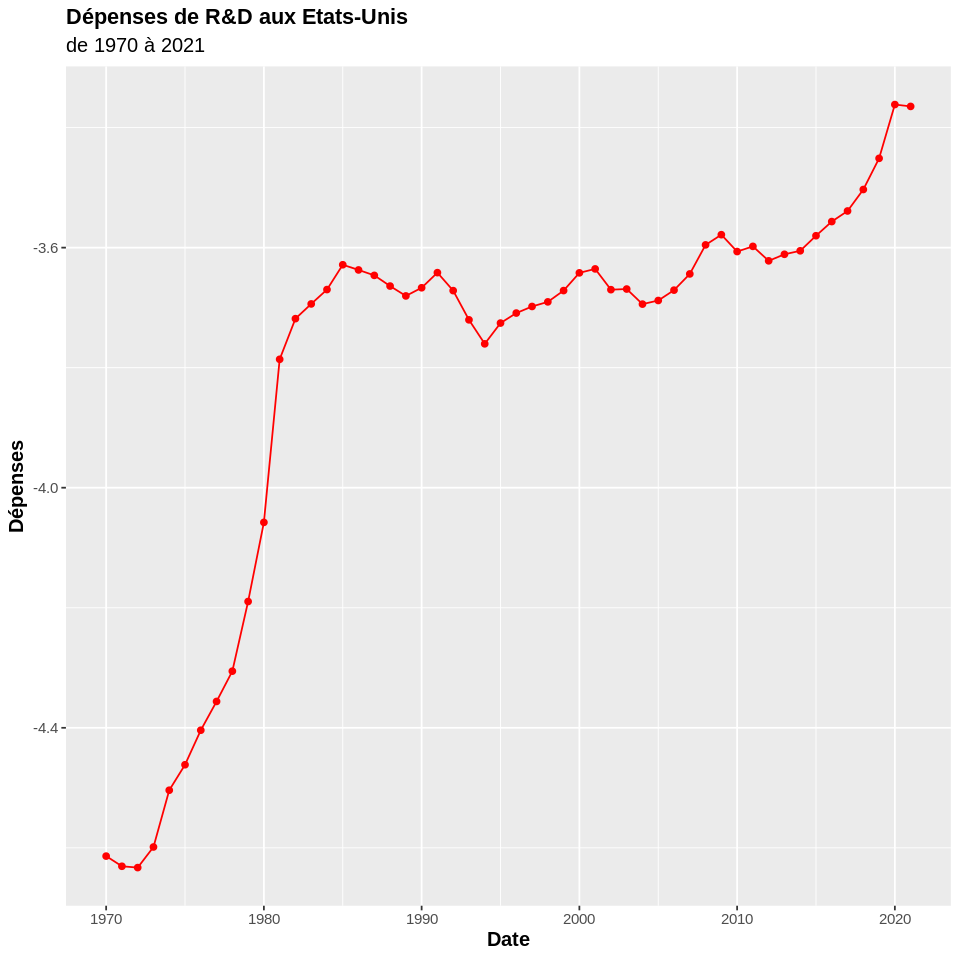

In [ ]:
p_dépenses <- ggplot(data = data_dépenseslog, aes(x = dates, y = dépenses$logPIB)) +
  geom_point(color = 'red') +
  geom_line(color = 'red') +
  xlab('Date') +
  ylab('Dépenses de R&D') +
  labs(y = "Dépenses", title = "Dépenses de R&D aux Etats-Unis", subtitle = "de 1970 à 2021") +
  theme(
    plot.title = element_text(size = 13, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text = element_text(size = 9),
    axis.title = element_text(size = 12, face = "bold")
  )

print(p_dépenses)


**<ins>Commentaire<ins>** :

Les dépenses de R&D aux Etats-Unis ont une allure globalement croissante sur la période estimée. On peut découper la série en deux périodes :</span>
    
**1) 1970 - 1985 : Forte croissance des dépenses de R&D** <br>
>Augmentation significative des dépenses de R&D aux États-Unis expliquées par des avancées technologiques significatives telles que l'émergence de l'industrie des logiciels (création de Microsoft en 1975) et la naissance de l'industrie du jeu vidéo (Pong en 1972, qui est un des premiers jeux vidéo d'arcade).

    
**2) 1985 - 2021 : Ralentissement de la croissance des dépenses de R&D** <br>
>Ce ralentissement peut s'expliquer par le fait qu'une fois que les innovations fondamentales ont été développées, chaque étape suivante pour les améliorer devient plus complexe, exigeant des dépenses de R&D plus importantes (besoin des ressources humaines hautement qualifiées, des équipements de pointe et des infrastructures spécialisées) pour des gains proportionnellement moindres.</span>
    
Comme il y a une tendance haussière, la moyenne de la série ne semble constante au fil du temps, cela suggère une non-stationnarité en moyenne.

Par conséquent, on peut émettre l'hypothèse de la non stationnarité de la série.

### 2.2 Autocorrélogramme simple

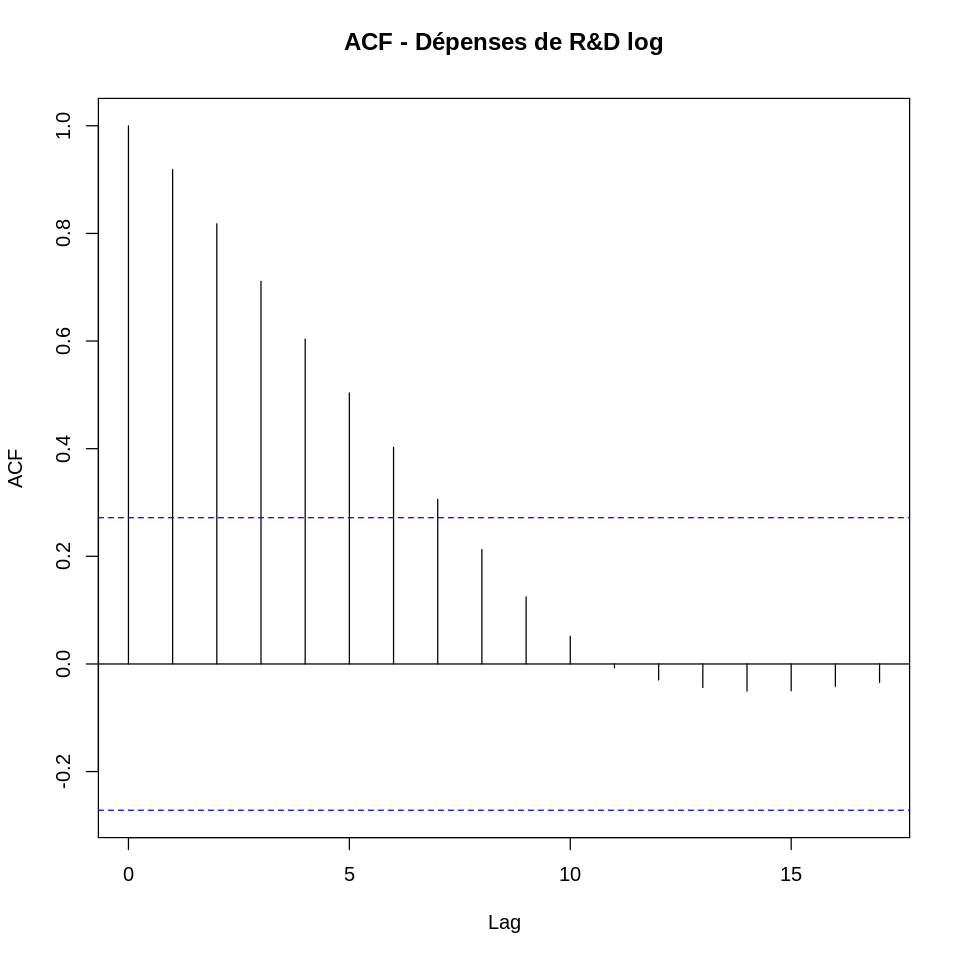

In [ ]:
acf_dépenses <- acf(data_dépenseslog$dépenses, main = "ACF - Dépenses de R&D log")

<span style="color:blue;">**<ins>Commentaire<ins>** : Les autocorrélations sont significatives jusqu'au 7ème retard et décroissent relativement lentement.</span>

###  2.3 Autocorrélogramme partiel

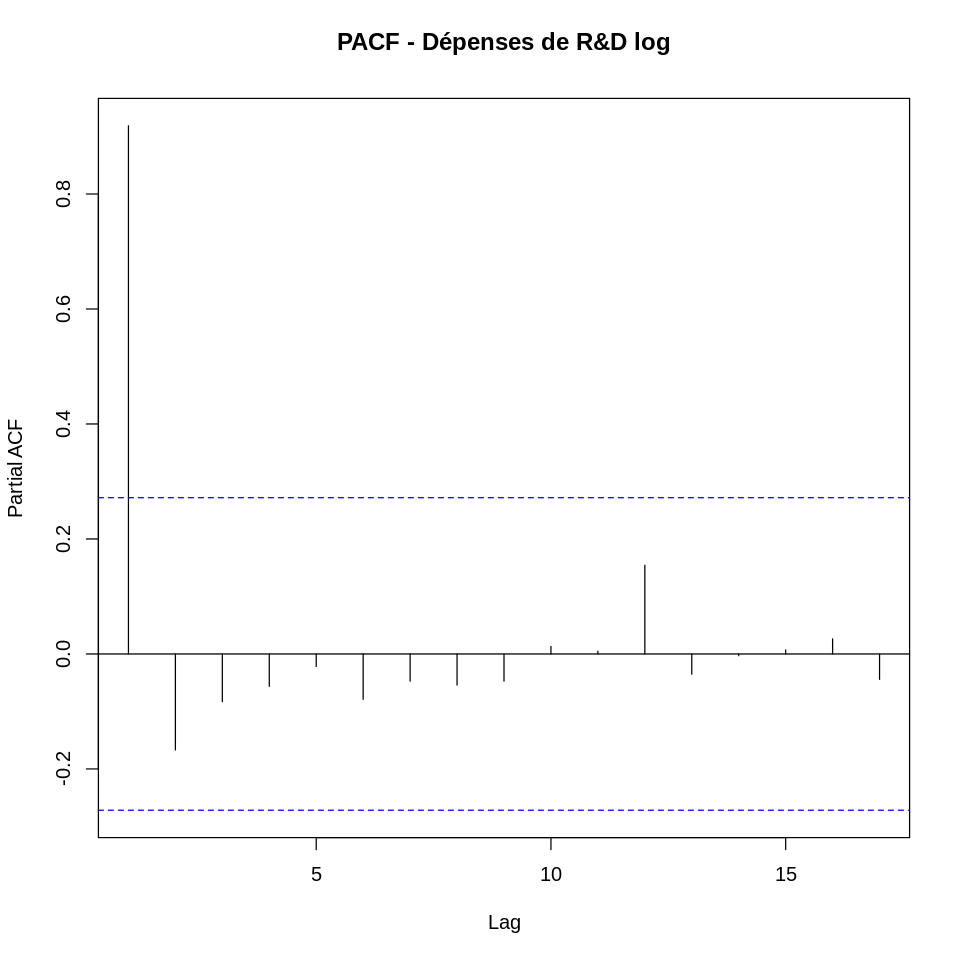

In [ ]:
pacf_dépenses <- pacf(data_dépenseslog$dépenses, main = "PACF - Dépenses de R&D log")

<span style="color:blue;">**<ins>Commentaire<ins>** :  Il existe une seule autocorrélation significativement différente de 0.</span>

<span style="color:red;">**<ins>Commentaire<ins>** : Au total, les autocorrélogrammes simple et partiel semblent montrer un processus AR(1)
 </span>

### 3. La productivité du travail aux Etats-Unis de 1970 à 2021

<ins>Etape préliminaire</ins> : transformation des données en log pour donner davantage d'importance aux faibles variations et pour

In [ ]:
productivité$logPIB <- log(productivité)

Warning message in productivité$logPIB <- log(productivité):
“Coercing LHS to a list”


Création d'un data frame avec le chômage et les dates pour faciliter la construction du graphique.

In [ ]:
data_productivitélog <- data.frame(dates = Base$Dates,productivité$logPIB)

### 3.1 Représentation graphique

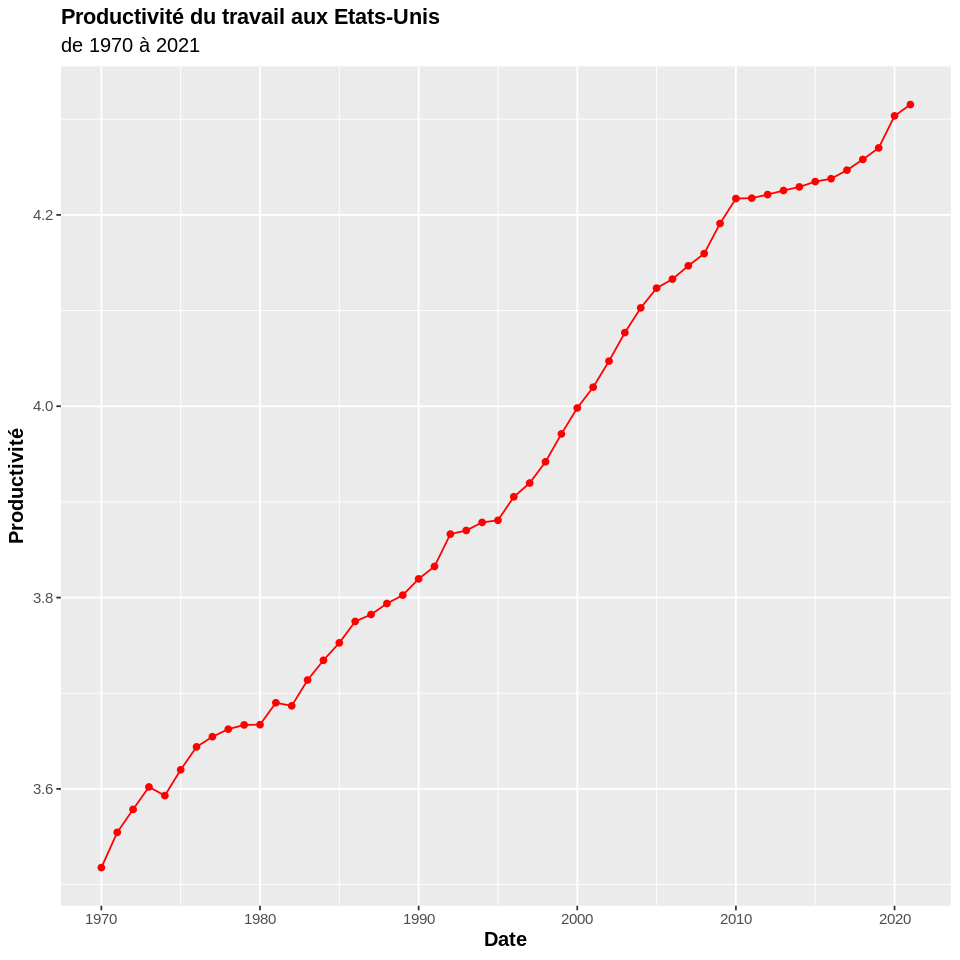

In [ ]:
p_productivité <- ggplot(data = data_productivitélog, aes(x = dates, y = productivité$logPIB)) +
  geom_point(color = 'red') +
  geom_line(color = 'red') +
  xlab('Date') +
  ylab('Productivité du travail') +
  labs(y = "Productivité", title = "Productivité du travail aux Etats-Unis", subtitle = "de 1970 à 2021") +
  theme(
    plot.title = element_text(size = 13, face = "bold"),
    plot.subtitle = element_text(size = 12),
    axis.text = element_text(size = 9),
    axis.title = element_text(size = 12, face = "bold")
  )

print(p_productivité)


### 3.1 Autocorrélogramme simple

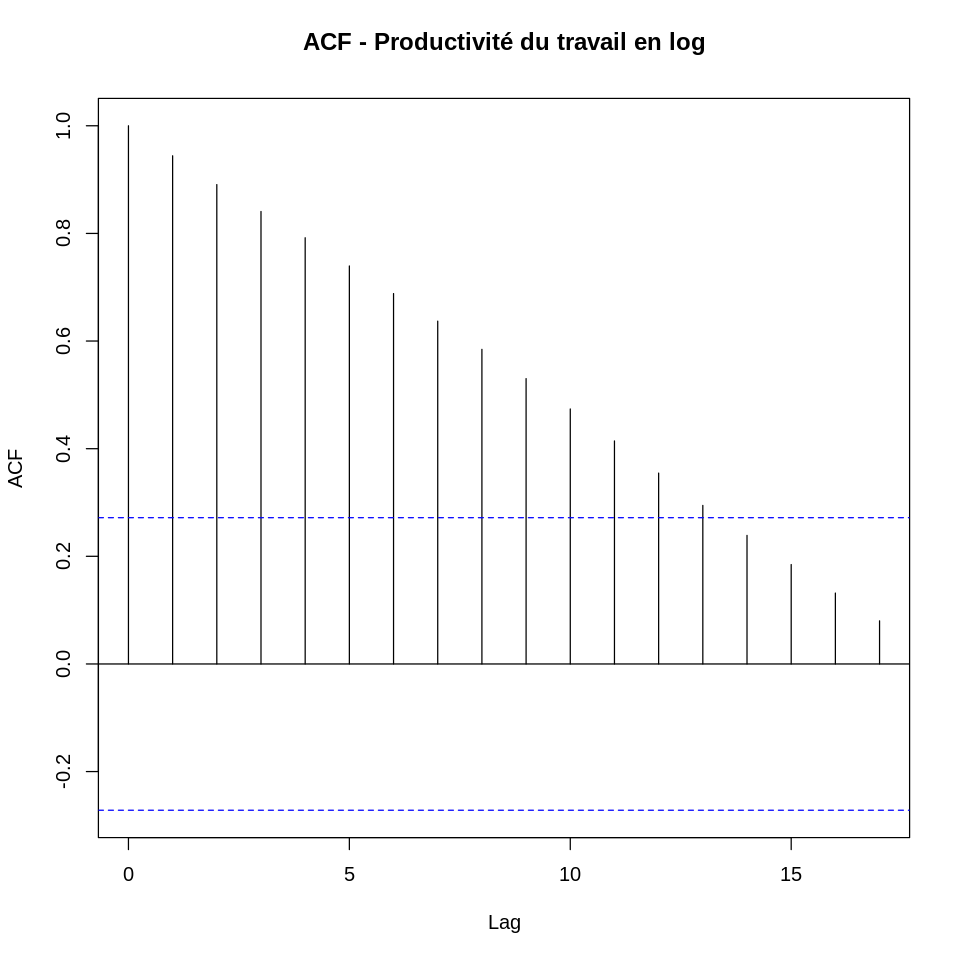

In [ ]:
acf_productivité <- acf(data_productivitélog$productivité, main = "ACF - Productivité du travail en log")

<span style="color:blue;">**<ins>Commentaire<ins>** : Il y a 13 autocorrélations significatives qui décroissent relativement lentement. </span>

###  3.2 Autocorrélogramme partiel

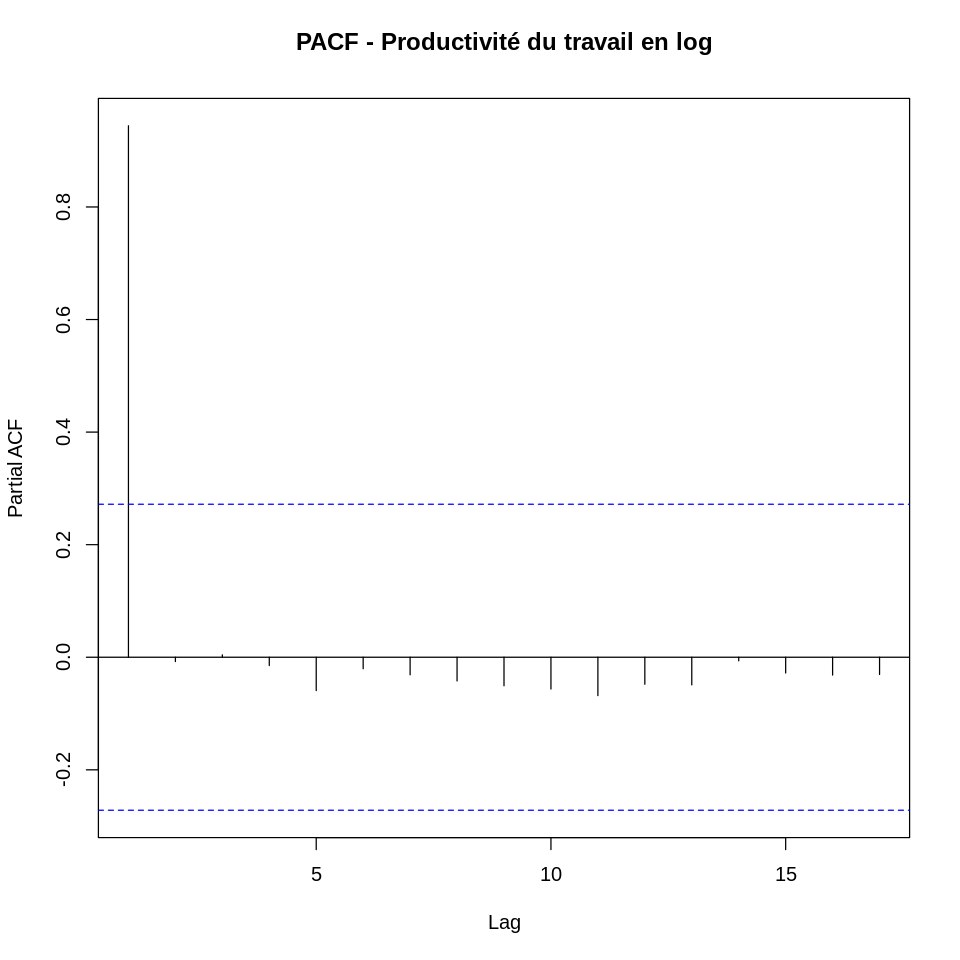

In [ ]:
pacf_productivité <- pacf(data_productivitélog$productivité, main = "PACF - Productivité du travail en log")

<span style="color:blue;">**<ins>Commentaire<ins>** : Il existe une seule autocorrélation significativement différente de 0.
  </span>

<span style="color:red;">**<ins>Commentaire<ins>** : Au total, les autocorrélogrammes simple et partiel semblent montrer un processus AR(1)
 </span>

## II - Tests sur la stationnarité et stationnarisation

Il convient maintenant de vérifier la stationnarité de nos séries. Nous allons commencer par faire un test de Dickey-Fuller augmenté, permettant de déterminer la présence de racine unitaire qui est une caractéristique des processus non stationnaires de type stochastique.

Pour cela, nous allons appliquer une stratégie séquentielle de test visant d'une part à tester la présence de racine uniatire et d'autre part à évaluer la présence éventuelle d'une composante déterministe.

Ainsi, nous allons tester 3 modèles, du plus général au plus particulier. Pour chaque modèle, **les hypothèses de test** sont les suivantes :
    
$\begin{align*}
H_0 &: \rho = 0 \Rightarrow x_t \text{ non stationnaire} \\
H_1 &: \rho < 0 \Rightarrow x_t \text{ stationnaire}
\end{align*}$
    
**La statistique de test** est la suivante :
    
$t_{\hat{\rho}} = \frac{\hat{\rho}}{\hat{\sigma}_{\hat{\rho}}} = \frac{\hat{\phi}_1 - 1}{\hat{\sigma}_{\Phi_1}}$

**La règle de décision** est la suivante :
    
On rejette $H_0$ si $t_{\hat{\rho}} < c$ (le seuil critique)
    
<ins> 1) Modèle avec constante et tendance déterministe<ins> : $\Delta x_t = c + bt + \rho x_{t-1} + \sum_{j=1}^{p} \gamma_j \Delta x_{t-j} + \epsilon_t$

Pour ce modèle, nous allons également tester **les hypothèses** suivantes :

$\begin{align*}
H_0 &: b = 0 \Rightarrow \text{La tendance n'a pas d'effet significatif} \\
H_1 &: b \neq 0 \Rightarrow \text{La tendance a un effet significatif}
\end{align*}$

**La statistique de test** est la suivante :

$t_{\hat{b}} = \frac{\hat{b}}{\hat{\sigma}_{\hat{b}}}$

 **La règle de décision** est la suivante :
    
On rejette $H_0$ si $|t_{\hat{b}}| > c$ (le seuil critique)
    
<ins> 2) Modèle avec constante<ins> : $\Delta x_t = c + \rho x_{t-1} + \sum_{j=1}^{p} \gamma_j \Delta x_{t-j} + \varepsilon_t$<br>

Pour ce modèle, nous allons également tester **les hypothèses** suivantes :

$\begin{align*}
H_0 &: c = 0 \Rightarrow \text{La constante n'a pas d'effet significatif} \\
H_1 &: c  \neq 0 \Rightarrow \text{La constante a un effet significatif}
\end{align*}$

La **statistique de test** est la suivante :

$t_{\hat{c}} = \frac{\hat{c}}{\hat{\sigma}_{\hat{c}}}$

 **La règle de décision** est la suivante :
    
On rejette $H_0$ si $|t_{\hat{c}}| > c$ (le seuil critique)<br>
    
<ins> 3) Modèle sans constante et sans tendance déterministe <ins> : $\Delta x_t = \rho x_{t-1} + \sum_{j=1}^{p} \gamma_j \Delta x_{t-j} + \varepsilon_t$<br>


Nous allons ensuite faire un test KPSS qui nous permet d'avoir une double vérification des résultats obtenus suite au test ADF.

Ses **hypothèses de test** sont les suivantes :

$\begin{align*}
H_0 &: \text{pas de RU} \Rightarrow x_t \text{ stationnaire} \\
H_1 &: \text{RU} \Rightarrow x_t \text{ non stationnaire}
\end{align*}$
    
Avec ces hypothèses de test, on limite en priorité le risque de rejeter à tort l’absence de RU.

 **La règle de décision** est la suivante :
    
On rejette $H_0$ si $LM > c$ (le seuil critique)


Pour finir, nous allons conclure sur la stationnarité des séries et les stationnariser si besoin.

### 1. Le chômage aux Etats-Unis entre 1970 et 2021

On commencer par appliquer le test ADF au chômage des Etas-Unis. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

### 1.1 Stratégie de test unitaire : test de Dickey-Fuller augmenté

**Etape 1 : Modèle avec tendance déterministe**

In [ ]:
adf1<-ur.df(y = data_chômagelog$chômage,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41960 -0.10252 -0.04233  0.07211  0.67368 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.993076   0.330824  -3.002  0.00466 **
z.lag.1     -0.384002   0.123784  -3.102  0.00356 **
tt          -0.002964   0.002376  -1.248  0.21964   
z.diff.lag   0.238493   0.166752   1.430  0.16062   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1802 on 39 degrees of freedom
Multiple R-squared:  0.1986,	Adjusted R-squared:  0.137 
F-statistic: 3.222 on 3 and 39 DF,  p-value: 0.0329


Value of test-statistic is: -3.1022 3.2214 4.8264 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6.50 

<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-3.102$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau3.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-3.102 >-3.45$.
La statistique du test ADF est également supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%. On ne rejette donc pas l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la tendance, cette dernière est égale à $t_{\hat{b}} = -1.248  $. Comme on ne rejette pas l'hypothèse d'absence de racine unitaire, le seuil de rejet figure dans la table de Dickey Fuller. Pour un risque de première espèce de 5% et 50 observations, il est égal à $3.18$. On a donc |$t_{\hat{b}}| = 1.248  < 3.18$ : on ne rejette pas l'hypothèse nulle et on conclu à la non significativé de la tendance déterministe. On passe maintenant au modèle avec constante. </span>

**Etape 2 : Modèle avec constante**

In [ ]:
adf2<-ur.df(y = data_chômagelog$chômage,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.45982 -0.09361 -0.03829  0.08052  0.63828 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -0.9298     0.3292  -2.825  0.00735 **
z.lag.1      -0.3299     0.1167  -2.826  0.00732 **
z.diff.lag    0.1901     0.1633   1.164  0.25127   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1814 on 40 degrees of freedom
Multiple R-squared:  0.1667,	Adjusted R-squared:  0.125 
F-statistic:     4 on 2 and 40 DF,  p-value: 0.02609


Value of test-statistic is: -2.8259 3.9983 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-2.826$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau2.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-2.826 > -2.89$.
La statistique du test ADF est également supérieure aux seuils de rejet pour le risque de première espèce de 1% mais elle est inférieure au seuil de rejet pour le risque de première espèce de 10%.
Ici, nous faisons le choix de retenir le résultat pour un risque de première espèce de 5%, on ne rejette donc pas l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la constante, cette dernière est égale à $t_{\hat{c}} =  -2.825 $. Comme on rejette l'hypothèse d'absence de racine unitaire, le seuil de rejet figure dans la table de Dickey Fuller. Pour un risque de première espèce de 5%, il est égal à $2.89$. On a donc |$t_{\hat{c}}| = 2.825< 2.89$ : on ne rejette donc pas l'hypothèse nulle de non significativé de la constante et donc on passe au modèle sans tendance et sans constante. </span>

**Etape 3 : Modèle sans constante et sans tendance**

In [ ]:
adf3<-ur.df(y = data_chômagelog$chômage,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.42809 -0.09817 -0.06407  0.04036  0.78371 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
z.lag.1    -0.001303   0.010614  -0.123    0.903
z.diff.lag  0.018026   0.163903   0.110    0.913

Residual standard error: 0.1962 on 41 degrees of freedom
Multiple R-squared:  0.0006514,	Adjusted R-squared:  -0.0481 
F-statistic: 0.01336 on 2 and 41 DF,  p-value: 0.9867


Value of test-statistic is: -0.1227 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-0.123$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau1.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}= -0.123 > -1.95 $.
La statistique du test ADF est également supérieure aux seuils de rejet pour les risquse de première espèce de 10% et de 1%. On ne rejette donc pas l'hypothèse nulle de racine unitaire de la série.

<span style="color:red;">**<ins>Conclusion finale<ins>** :
Les résultats des tests ADF nous amènent à conclure que le chômage (en log) des Etats-Unis est une série non stationnaire sans constante et sans tendance déterministe.

### 1.2 Test de stationnarité de KPSS

Nous allons vérifier avec le test KPSS si notre série est bien stationnaire autour d'une constante. On reporte ici les résultats du test KPSS dans le modèle avec constante car c'est le modèle le plus proche de celui retenu précédemment dans la stratégie séquentielle.


**Stationnarité autour d'une constante**

In [ ]:
kpss_mu<-ur.kpss(y=data_chômagelog$chômage,type="mu",lags="long")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 0.1765 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test KPSS avec une constante est égale à $LM_{\text{KPSS}}=0.1765$.
Elle est inférieure au seuil de rejet à 5% : $0.1765  < 0.463$. La statistique du test est également inférieure aux seuils de rejet pour les risques de première espèce de 1%, 2.5% et 10%. On ne rejette donc pas l'hypothèse de stationnarité du taux de chômage autour d'une constante.

### 1.3 Conclusion générale et stationnarisation (si besoin)

On voit que les conclusions des tests ADF et KPSS sont contradictoires en ce qui concerne la stationnarité du taux de chômage.

Pour trancher, on peut faire la régression par les MCO du taux de chômage sur une tendance déterministe afin de voir si cette dernière est significative. On teste les hypothèses suivantes :

$\begin{align*}
H_0 &: a = 0  \\
H_1 &: a \neq 0
\end{align*}$

In [ ]:
modele <- lm(data_chômagelog$chômage ~ seq_along(data_chômagelog$chômage))
summary(modele)


Call:
lm(formula = data_chômagelog$chômage ~ seq_along(data_chômagelog$chômage))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40727 -0.16237 -0.03891  0.14466  0.51822 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        -2.708916   0.068365  -39.62   <2e-16 ***
seq_along(data_chômagelog$chômage) -0.003703   0.002245   -1.65    0.105    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2429 on 50 degrees of freedom
Multiple R-squared:  0.05162,	Adjusted R-squared:  0.03266 
F-statistic: 2.722 on 1 and 50 DF,  p-value: 0.1053


On voit que p value de $a = 0.105 > 0.05$, on ne rejette donc pas l'hypothèse nulle et on conclu à la non significativé du coefficient.


De plus, des études empiriques sur le taux de chômage aux Etats-Unis conclut à la stationnarité du taux de chômage (Nelson and Plosser, 1982, Perron, 1988, Xiao and Phillips, 1997). <span style="color:red;">C'est donc un modèle de la forme $(Xt) ∼ I(0)$.

 ### 2. Les dépenses de R&D aux Etats-Unis de 1970 à 2021

On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

### 2.1 Stratégie de test unitaire : test de Dickey-Fuller augmenté

**Etape 1 : Modèle avec tendance déterministe**

In [ ]:
adf1<-ur.df(y = data_dépenseslog$dépenses,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.064546 -0.015840 -0.001216  0.012053  0.139886 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.9046946  0.1883766  -4.803 2.33e-05 ***
z.lag.1     -0.2366017  0.0478140  -4.948 1.47e-05 ***
tt           0.0015297  0.0006107   2.505 0.016544 *  
z.diff.lag   0.4520112  0.1071204   4.220 0.000141 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03562 on 39 degrees of freedom
Multiple R-squared:  0.5929,	Adjusted R-squared:  0.5616 
F-statistic: 18.94 on 3 and 39 DF,  p-value: 9.716e-08


Value of test-statistic is: -4.9484 9.2866 12.8486 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.

<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-4.948$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau3.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-4.948<-3.45$.
La statistique du test ADF est également inférieure aux seuils de rejet pour les risques de première espèce de 10% et 1%. On rejette donc l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la tendance, cette dernière est égale à $t_{\hat{b}} =  2.505 $. Comme on rejette l'hypothèse nulle de racine unitaire, le seuil de rejet figure dans la table de Student. Pour un risque de première espèce de 5% et 50 observations, il est égal à $1.96$. On a donc |$t_{\hat{b}}| =  2.505 > 1.96$ : on rejette donc l'hypothèse nulle de non significativité de la tendance déterministe. </span>
    

<span style="color:red;">**<ins>Conclusion finale<ins>** :
Les résultats des tests ADF nous amènent à conclure que les dépenses de R&D (en log) des Etats-Unis est une série sans UR avec tendance et constante, plus précisément une non stationnarité déterministe de la forme $(Xt) ∼ I(0)+ C + T$.

### 2.2 Test de stationnarité de KPSS

**Stationnarité autour d'une tendance déterministe**

In [ ]:
kpss_tau<-ur.kpss(y=data_dépenseslog$dépenses,type="tau",lags="long")
summary(kpss_tau)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 10 lags. 

Value of test-statistic is: 0.1306 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


La statistique du test KPSS avec une constante est égale à $LM_{\text{KPSS}}=0.1306$.
Elle est inférieure au seuil de rejet à 5% : $0.1306 < 0.146$. La statistique du test est également inférieure aux seuils de rejet pour le risque de première espèce de 2.5% et 1%. On ne rejette donc pas l'hypothèse de stationnarité des dépenses de R&D avec une tendance déterministe.

### 2.3 Conclusion générale et stationnarisation (si besoin)

L'application des tests de racine unitaire ADF et des tests de stationarité KPSS nous donne les résultats et on conclu donc à un modèle non stationnaire (avec de la stationnarité déterministe) de la forme $(Xt) ∼ I(0)+B+C$. Pour rendre cette série temporelle stationnaire, il faut estimer puis extraire la composante déterministe.

In [ ]:
serie <- data_dépenseslog$dépenses
index <- 1:52
index2 <- index^2
modele <- lm(serie ~ index + index2)
summary(modele)
residuals <- modele$residuals


Call:
lm(formula = serie ~ index + index2)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17876 -0.10997 -0.07037  0.10014  0.30530 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.6325312  0.0650197 -71.248  < 2e-16 ***
index        0.0560000  0.0056597   9.894 2.86e-13 ***
index2      -0.0007049  0.0001035  -6.809 1.31e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1503 on 49 degrees of freedom
Multiple R-squared:  0.8221,	Adjusted R-squared:  0.8149 
F-statistic: 113.2 on 2 and 49 DF,  p-value: < 2.2e-16


In [ ]:
data_dépenses_stat <- data.frame(dates = Base$Dates,residuals)

On peut maintenant revérifier si notre série est bien stationnaire.

**Etape 1 : Modèle avec tendance déterministe**

In [ ]:
adf1<-ur.df(y = data_dépenses_stat$residuals,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.096998 -0.023705 -0.002657  0.017616  0.167459 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0172715  0.0191185   0.903   0.3719    
z.lag.1     -0.1102943  0.0524926  -2.101   0.0421 *  
tt          -0.0003962  0.0005911  -0.670   0.5067    
z.diff.lag   0.6220501  0.1336196   4.655 3.69e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04307 on 39 degrees of freedom
Multiple R-squared:  0.3672,	Adjusted R-squared:  0.3185 
F-statistic: 7.543 on 3 and 39 DF,  p-value: 0.0004271


Value of test-statistic is: -2.1011 1.628 2.2477 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04

<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-2.101$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau3.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-2.101>-3.45$.La statistique du test ADF est également supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%. On ne rejette donc pas l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la tendance, cette dernière est égale à $t_{\hat{b}} = -0.670 $. Comme on rejette l'hypothèse d'absence de racine unitaire, le seuil de rejet qui figurent dans la table de Dickey Fuller. Pour un risque de première espèce de 5% et 50 observations, il est égal à $3.18$. On a donc $|t_{\hat{b}}| = 0.670< 3.18$ : on ne rejette donc pas l'hypothèse nulle de non significativité de la tendance. On passe donc au modèle avec constante. </span>

**Etape 2 : Modèle avec constante**

In [ ]:
adf2<-ur.df(y = data_dépenses_stat$residuals,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.09001 -0.02378 -0.00284  0.01485  0.17599 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.005267   0.006638   0.793   0.4322    
z.lag.1     -0.094806   0.046806  -2.026   0.0495 *  
z.diff.lag   0.604745   0.130195   4.645 3.64e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04277 on 40 degrees of freedom
Multiple R-squared:  0.3599,	Adjusted R-squared:  0.3279 
F-statistic: 11.24 on 2 and 40 DF,  p-value: 0.0001334


Value of test-statistic is: -2.0255 2.2484 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-2.026$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau2.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-2.026>-2.89$.La statistique du test ADF est également supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%. On ne rejette donc pas l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la constante, cette dernière est égale à $t_{\hat{c}} = 0.793$. Comme on ne rejette pas l'hypothèse d'absence de racine unitaire, le seuil de rejet qui figurent dans la table de Dickey Fuller. Pour un risque de première espèce de 5% et 50 observations, il est égal à $2.89$. On a donc |$t_{\hat{b}}| =  0.793 < 2.89$ : on ne rejette donc pas l'hypothèse nulle de non significativité de la constante. On passe au modèle sans constante ni tendance. </span>
    

**Etape 3 : Modèle sans tendance et sans constante**

In [ ]:
adf3<-ur.df(y = data_dépenses_stat$residuals,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.088989 -0.019240  0.002688  0.020421  0.179794 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
z.lag.1    -0.09173    0.04643  -1.975    0.055 .  
z.diff.lag  0.61940    0.12829   4.828 1.95e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04258 on 41 degrees of freedom
Multiple R-squared:  0.3685,	Adjusted R-squared:  0.3377 
F-statistic: 11.96 on 2 and 41 DF,  p-value: 8.074e-05


Value of test-statistic is: -1.9755 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-1.975$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau1.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-1.975 < -1.95$.
La statistique du test ADF est également inférieure aux seuils de rejet pour le risque de première espèce de 10%. On rejette donc l'hypothèse nulle de non stationnarité de la série.

<span style="color:red;">**<ins>Conclusion finale<ins>** :
Les résultats des tests ADF nous amènent à conclure que les dépenses de R&D (une fois différenciée) sont un processus stationnaire de la forme $(Xt) ∼ I(0)$

### 3. La productivité du travail aux Etats-Unis de 1970 à 2021

On applique le test ADF avec une constante et une tendance déterministe. Le nombre de retards maximum est fixé à 8 et le nombre de retards optimal est déterminé par la minimisation du critère AIC.

### 3.1 Stratégie de test unitaire : test de Dickey-Fuller augmenté

**Etape 1 : Modèle avec constante et tendance déterministe**

In [ ]:
adf1<-ur.df(y = data_productivitélog$productivité,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.015582 -0.005702 -0.002276  0.006841  0.021104 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.522074   0.219683   2.376   0.0226 *
z.lag.1     -0.147758   0.063279  -2.335   0.0249 *
tt           0.002439   0.001055   2.312   0.0263 *
z.diff.lag1  0.202349   0.148370   1.364   0.1807  
z.diff.lag2  0.372846   0.160886   2.317   0.0260 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.009574 on 38 degrees of freedom
Multiple R-squared:  0.2225,	Adjusted R-squared:  0.1407 
F-statistic: 2.719 on 4 and 38 DF,  p-value: 0.04382


Value of test-statistic is: -2.335 4.6324 2.7292 

Critical values for test statistics

<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-2.335$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau3.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-2.335>-3.45$.La statistique du test ADF est également supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%. On ne rejette donc pas l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la tendance, cette dernière est égale à $t_{\hat{b}} = 2.312 $. Comme on ne rejette pas l'hypothèse d'absence de racine unitaire, le seuil de rejet figure dans la table de Dickey Fuller. Pour un risque de première espèce de 5% et 50 observations, il est égal à $3.18$. On a donc |$t_{\hat{b}}| = 2.312 < 3.18$ : on ne rejette donc pas l'hypothèse nulle de non significativité de la tendance et on passe au modèle avec constante. </span>
    

**Etape 2 : Modèle avec constante**

In [ ]:
adf2<-ur.df(y = data_productivitélog$productivité,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0204356 -0.0067211 -0.0005487  0.0074943  0.0203805 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.018423   0.029738   0.620    0.539
z.lag.1     -0.002387   0.007448  -0.321    0.750
z.diff.lag1  0.166132   0.155541   1.068    0.292
z.diff.lag2  0.258416   0.161383   1.601    0.117

Residual standard error: 0.01009 on 39 degrees of freedom
Multiple R-squared:  0.1131,	Adjusted R-squared:  0.04493 
F-statistic: 1.659 on 3 and 39 DF,  p-value: 0.1917


Value of test-statistic is: -0.3206 3.8478 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-0.321$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau2.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-0.321>-2.89$.La statistique du test ADF est également supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%. On ne rejette donc pas l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la tendance, cette dernière est égale à $t_{\hat{c}} = 0.620$. Comme on ne rejette pas l'hypothèse d'absence de racine unitaire, le seuil de rejet figure dans la table de Dickey Fuller. Pour un risque de première espèce de 5% et 50 observations, il est égal à $2.89$. On a donc |$t_{\hat{c}}| = 0.620 < 2.89$ : on ne rejette donc pas l'hypothèse nulle de non significativité de la constante et on passe au modèle sans constante et sans tendance déterministe. </span>
    

**Etape 3 : Modèle sans constante et sans tendance déterministe**

In [ ]:
adf3<-ur.df(y = data_productivitélog$productivité,type=c("none"), lag=8, selectlags = c('AIC'))
summary(adf3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0215746 -0.0074796 -0.0005813  0.0076307  0.0191378 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
z.lag.1     0.002199   0.000807   2.725  0.00949 **
z.diff.lag1 0.167112   0.154331   1.083  0.28537   
z.diff.lag2 0.264594   0.159829   1.655  0.10565   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01002 on 40 degrees of freedom
Multiple R-squared:  0.7212,	Adjusted R-squared:  0.7003 
F-statistic:  34.5 on 3 and 40 DF,  p-value: 3.536e-11


Value of test-statistic is: 2.7251 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=2.725$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau1.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=2.725>-1.95$.La statistique du test ADF est également supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%. On ne rejette donc pas l'hypothèse nulle de racine unitaire.

<span style="color:red;">**<ins>Conclusion finale<ins>** :
Les résultats des tests ADF nous amènent à conclure que la productivité (en log) des Etats-Unis est une série DS de la forme $I(1)$ sans tendance ni constante. On dit aussi qu'elle est un processus DS sans dérive (drift).

### 3.2 Test de stationnarité de KPSS

**Stationnarité autour d'une constante**

In [ ]:
kpss_mu<-ur.kpss(y=data_productivitélog$productivité,type="mu",lags="long")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 0.5873 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test KPSS avec une constante est égale à $LM_{\text{KPSS}}=0,5873$.
Elle est supérieure au seuil de rejet à 5% : $0.5873 > 0.463$. La statistique du test est également supérieure aux seuils de rejet pour les risques de première espèce de 10% et 2.5%. On  rejette donc l'hypothèse de stationnarité de la productivité avec une constante.

### 3.3 Conclusion générale et stationnarisation (si besoin)

L'application des tests de racine unitaire ADF et des tests de stationarité KPSS nous donne les résultats et on conclu donc à un modèle non stationnaire (avec de la stationnarité déterministe) et une constante de la forme $(Xt) ∼ I(1)$.
Pour rendre cette série temporelle stationnaire, il faut la différencier une fois.

Notre nouvelle série stationnarisée sera alors :

In [ ]:
data_productivité_diff  <- diff(data_productivitélog$productivité)

On peut maintenant revérifier si notre série est bien stationnaire.

**Etape 1 : Modèle avec constante et tendance déterministe**

In [ ]:
adf1<-ur.df(y = data_productivité_diff,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adf1)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0204984 -0.0064027 -0.0007548  0.0075358  0.0201967 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  1.062e-02  5.112e-03   2.078  0.04456 * 
z.lag.1     -5.974e-01  1.949e-01  -3.065  0.00399 **
tt          -3.978e-05  1.291e-04  -0.308  0.75968   
z.diff.lag  -2.512e-01  1.623e-01  -1.548  0.12986   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01013 on 38 degrees of freedom
Multiple R-squared:  0.4373,	Adjusted R-squared:  0.3928 
F-statistic: 9.842 on 3 and 38 DF,  p-value: 6.165e-05


Value of test-statistic is: -3.0654 3.1836 4.7201 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3

<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-3.065$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau3.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-3.065>-3.45$.La statistique du test ADF est également supérieure aux seuils de rejet pour les risques de première espèce de 1% et 10%. On ne rejette donc pas l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la tendance, cette dernière est égale à $t_{\hat{b}} = -0.308$. Comme on ne rejette pas l'hypothèse d'absence de racine unitaire, le seuil de rejet qui figurent dans la table de Dickey Fuller. Pour un risque de première espèce de 5% et 50 observations, il est égal à $3.18$. On a donc |$t_{\hat{b}}| = 0.308 < 3.18$ : on ne rejette donc pas l'hypothèse nulle de non significativité de la tendance et on passe au modèle avec constante. </span>
    

**Etape 2 : Modèle avec constante**

In [ ]:
adf2<-ur.df(y = data_productivité_diff,type=c("drift"), lag=8, selectlags = c('AIC'))
summary(adf2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020952 -0.006907 -0.001172  0.007702  0.019428 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.009418   0.003266   2.884  0.00637 **
z.lag.1     -0.595440   0.192506  -3.093  0.00365 **
z.diff.lag  -0.253706   0.160161  -1.584  0.12125   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01001 on 39 degrees of freedom
Multiple R-squared:  0.4358,	Adjusted R-squared:  0.4069 
F-statistic: 15.07 on 2 and 39 DF,  p-value: 1.42e-05


Value of test-statistic is: -3.0931 4.8402 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


<span style="color:blue;">**<ins>Commentaire<ins>** :
    
<span style="color:blue;"> La statistique du test ADF est égale à $t_{\text{ADF}}=-3.093$. On compare maintenant cette statistique de test aux seuils de rejet qui figurent sur la ligne tau2.<br>
Pour un risque de première espèce de 5%, $t_{\text{ADF}}=-3.093<-2.89$.La statistique du test ADF est également inférieure aux seuils de rejet pour le risque de première espèce de 10%. On rejette donc l'hypothèse nulle de racine unitaire.

<span style="color:blue;"> Concernant la statistique de test de la constante, cette dernière est égale à $t_{\hat{c}} = 2.884$. Comme on rejette l'hypothèse d'absence de racine unitaire, le seuil de rejet figure dans la table de Student. Pour un risque de première espèce de 5% et 50 observations, il est égal à $1.96$. On a donc |$t_{\hat{b}}| = 2.884> 1.96$ : on rejette donc l'hypothèse nulle de non significativité de la constante. </span>
    

En ayant différencié notre série, le test ADF nous dit qu'elle est stationnaire avec une constante. Nous allons le vérifier par un test KPSS.

**Stationnarité autour d'une constante**

In [ ]:
kpss_mu<-ur.kpss(y=data_productivité_diff,type="mu",lags="long")
summary(kpss_mu)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 10 lags. 

Value of test-statistic is: 0.099 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


La statistique du test KPSS avec une constante est égale à $LM_{\text{KPSS}}=0,099$.
Elle est inférieure au seuil de rejet à 5% : $0.099 < 0.463$. La statistique du test est également inférieure aux seuils de rejet pour les risques de première espèce de 10%, 2.5% et 1%. On ne rejette donc pas l'hypothèse de stationnarité de la productivité avec une constante.

<span style="color:red;">**<ins>Conclusion finale<ins>** :
Les résultats des tests ADF et KPSS nous amènent à conclure que la productivité des Etats-Unis (une fois différenciée) est un processus stationnaire avec constante de la forme $(Xt) ∼ I(0)+C$

## III - Estimation et tests de validation d'un modèle ARMA pour le chômage

Nous choisissons d'écarter les trois dernières observations de l'échantillon. Dans notre cas, cela revient à estimer le modèle avec les 49 premières observations. L'objectif est de comparer les valeurs prédites par le modèle final aux valeurs réalisées. Ainsi, nous pourrons évaluer la qualité des prévisions en-dehors de l'échantillon ("out-of-sample") utilisé pour l'estimer.

Dans la partie II, les autocorrélogrammes simple et partiel du chômage nous faisaient penser à un ARMA(1,3). Toutefois, en partant de ce modèle, le test de significativité des coefficients ne nous a pas permis d'aboutir à une conclusion. C'est pour cela que nous allons nous essayer aux tests de validation pour un AR(1) et un MA(3) afin de choisir, à partir des résultats, le modèle le plus satisfaisant et parcimonieux.

### 3.1 Estimation et tests de validation d'un AR(1) pour le chômage

In [ ]:
AR1<-Arima(y = data_chômagelog$chômage[1:49], order=c(1,0,0))
summary(AR1)
library(lmtest)
coeftest(AR1)

Series: data_chômagelog$chômage[1:49] 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1     mean
      0.8167  -2.8499
s.e.  0.0844   0.1050

sigma^2 = 0.02126:  log likelihood = 25.29
AIC=-44.59   AICc=-44.06   BIC=-38.91

Training set error measures:
                      ME      RMSE      MAE        MPE     MAPE      MASE
Training set 0.003730564 0.1427899 0.112078 -0.4150654 4.100171 0.9388483
                  ACF1
Training set 0.4110237


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1        0.816663   0.084418   9.674 < 2.2e-16 ***
intercept -2.849900   0.105011 -27.139 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


#####**<ins>Ecriture du modèle<ins>** :

$$\left\lbrace\begin{array}{l} CH_{\text{t}}  = -2.8499 + {\hat{c}}_{\text{t}}\,\\
{\hat{c}}_{\text{t}} = 0.816663 {\hat{c}}_{\text{t-1}} + {\hat{\epsilon}}_{\text{t}}\,
\end{array} \right.$$    

Avec E($CH_{t}$) = -2.8499 et ${\hat{c}}_{\text{t}}$ le chômage corrigé de sa moyenne.
    

Nous notons que la constante et le coefficient du modèle sont significatifs aux seuils de 1% et 5%.

En effet les z-values sont toutes deux, en valeur absolue, supérieures à 1.96 et 2.57 ( seuils critiques pour des risques de première espèce de 5% et 1% respectivement).
Nous verrons plus tard, si ce modèle est retenu, s'il n'y a pas des retards manquants ou superflus.

##### <ins>**Analyse des racines**<ins>  

On représente l'inverse de la racine dans le cercle unitaire. La condition de stationnarité impose qu'il doit être de module strictement inférieur à 1, c'est-à-dire à l'intérieur le cercle unitaire.

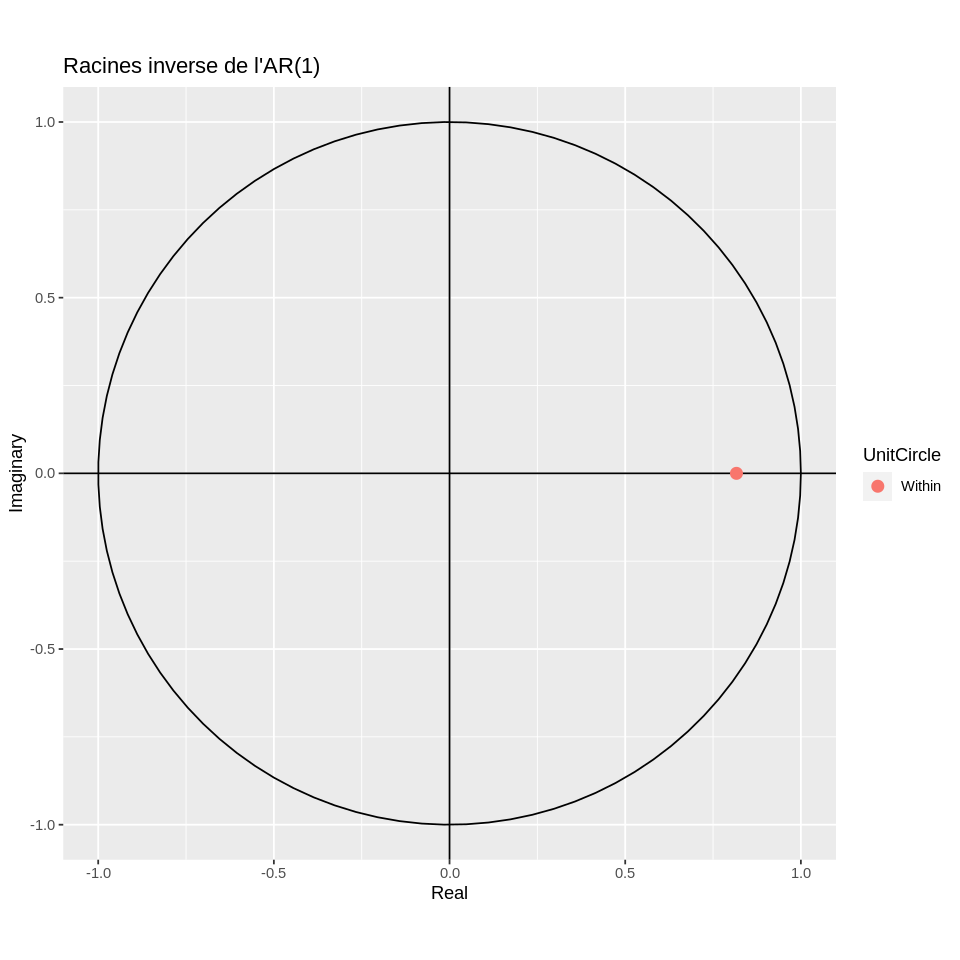

In [ ]:
autoplot(AR1,main="Racines inverse de l\'AR(1)")

La racine se situe bien à l'intérieur du cercle de module 1 : la condition de stationnarité est bien satisfaite.

Nous pouvons à présent effectuer les tests sur les résidus.

##### <ins>**Test sur les résidus**<ins>






Les tests de vérification des résidus sont :

1. Le test d'absence d'autocorrélation de Ljung-Box,
2. Le test de normalité de Jarque et Bera,
3. Le test d'absence d'effets ARCH de Engle et Granger.

###### <ins>Test de Ljung-Box : test d'absence d'autocorrélation des résidus<ins>

On teste l'absence d'autocorrélation des résidus jusqu'à l'ordre 10. Les hypothèses du test sont alors :

$$
\left\lbrace
\begin{array}{l}
H_{0}\,:\,\rho(1)=\rho(2)=\ldots=\rho(10)=0\\
H_{a}\,:\,\exists i\in\left\lbrace 1,\cdots,10 \right\rbrace\,\mathrm{tel\,que}\,\rho(i)\neq 0
\end{array}
\right.
$$


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 14.774, df = 9, p-value = 0.09733

Model df: 1.   Total lags used: 10



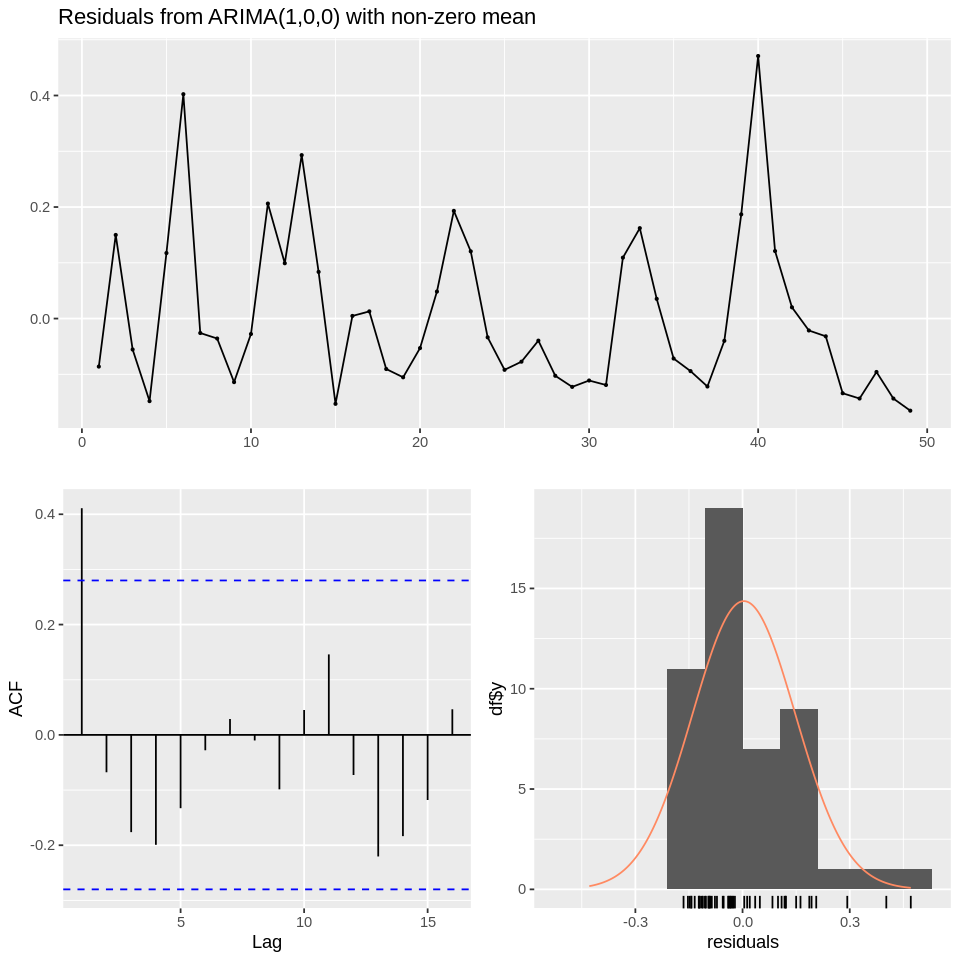

In [ ]:
test_resAR1<-checkresiduals(AR1,lag = 10)

**Commentaire**

1. L'autocorrélogramme montre qu'à l'exception de la première, toutes les autocorrélations sont situées dans les bornes de l'intervalle de confiance à 95\% et ne sont donc pas significativement différentes de 0.

2. La statistique de test de Ljung-Box est égale à $Q*(10) = 14.774$.
    + Sous $H_{0}$, $LB\_stat$ suit une loi $\chi^{2}(10-1) = \chi^{2}(9)$.
    + Les seuils critiques sont donc tirés de la loi $\chi^{2}(9)$ :
        + $Q^{*}(10)_{0.90}=14.684$ pour un risque de première espèce de 10%
        + $Q^{*}(10)_{0.95}=16.919$ pour un risque de première espèce de 5%
        + $Q^{*}(10)_{0.99}= 21.666$ pour un risque de première espèce de 1%
    + $Q*(10) = 14.774$  est inférieure aux seuils critiques de 1 et 5\%. Par ailleurs, la probabilité critique, égale à 0.09733 et est supérieure à ces seuils, ce qui conforte notre décision.  
    + On ne rejette donc pas l'hypothèse nulle d'absence d'autocorrélation des résidus aux seuils de 1 et 5% : les résidus ne sont pas autocorrélés.


###### <ins>Test de Jarque et Bera : test de l'hypothèse de normalité des résidus<ins>

In [ ]:
library(moments)
sprintf("Skewness des residus : %f",skewness(AR1$residuals))
sprintf("kurtosis des residus : %f",kurtosis(AR1$residuals))

[1] "Skewness des residus : 1.308341"

[1] "kurtosis des residus : 4.472163"

* Le skewness estimé est positif (environ égal 1.30) : il y a une asymétrie du côté des valeurs positives.
* Le kurtosis estimé est bien supérieur à 3 (environ 4.47) : cela est davantage le cas pour des distributions non gaussiennes mais nous ne tirons aucune conclusion pour le moment.

In [ ]:
library(tseries)
jarque.bera.test(AR1$residuals)


	Jarque Bera Test

data:  AR1$residuals
X-squared = 18.404, df = 2, p-value = 0.0001008


* La statistique du test de Jarque et Bera est égale à  est JB\_stat = 18.404.
* Sous $H_{0}$, LB\_stat suit une loi $\chi^{2}(2)$.
* Les seuils critiques sont :
    + $\chi^{2}_{0.90}(2)=4.61$ pour un risque de première espèce de 10%
    + $\chi^{2}_{0.95}(2)=5.99$ pour un risque de première espèce de 5%
    + $\chi^{2}_{0.99}(2)=9.21$ pour un risque de première espèce de 1%
    
* JB\_stat = 18.404 est supérieure aux seuils critiques pour des risques de première espèce de 1%, 5% et 10\%. De plus la probabilité critique, égale à 0.0001, est bien inférieure aux seuils habtituels : on rejette l'hypothèse nulle, les résidus ne sont pas normalement distribués aux seuils habituels.
* Ceci peut s'expliquer par la hausse du taux de chômage en 2010 (voir pics graphique chômage partie I) durant la grande récession et peut justifier un kurtosis bien supérieur à 3.

###### <ins>Test de Engle Granger : test d'absence d'effets ARCH<ins>

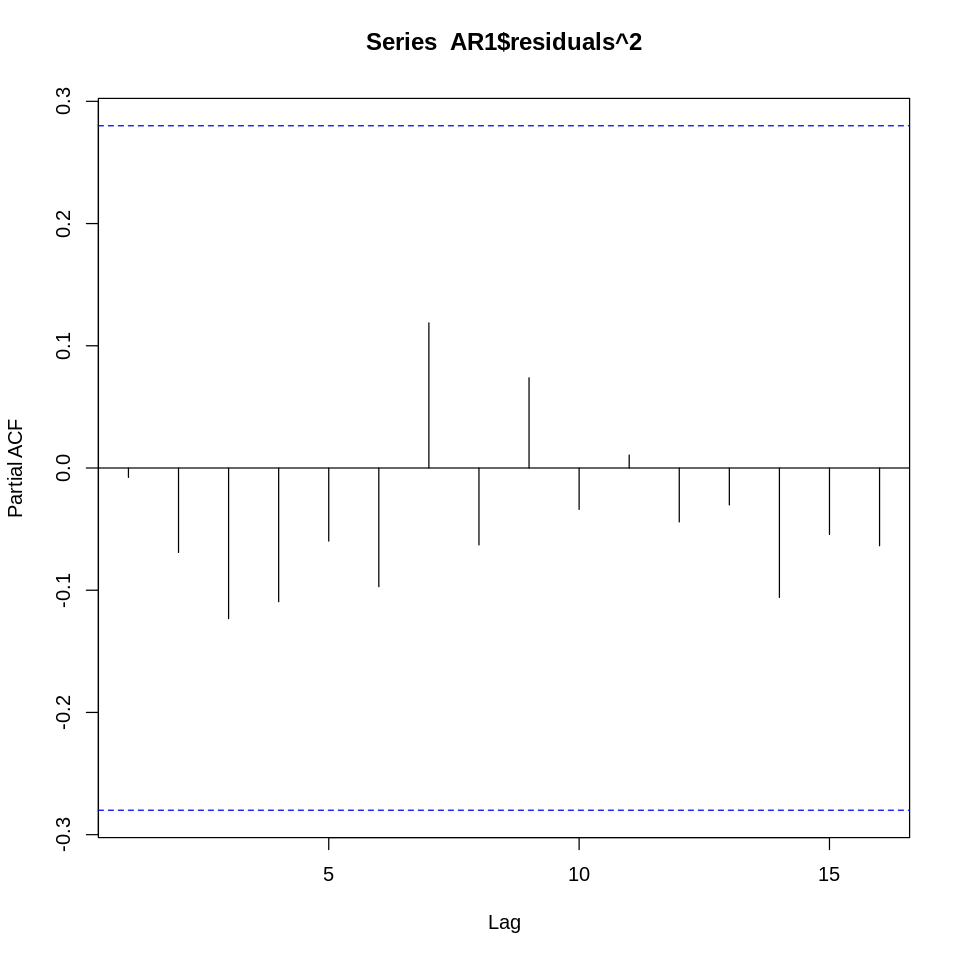

In [ ]:
pacf(AR1$residuals^2)

Si une autocorrélation partielle (des résidus au carré de la série) est significative au-delà du premier retard, alors cela peut indiquer une dépendance conditionnelle à l'information passée (i.e. que la volatilité en t dépend de la volatilité passée). Si cela est vrai, nous devrons ajouter un modèle GARCH afin de mieux capturer la structure de la volatilité.

Dans notre cas, nous n'observons à priori aucune autocorrélation partielle significative, cela peut laisser penser que nous n'avons pas d'effet ARCH, toutefois  à nous d'en tester la véracité.


On teste l'hypothèse d'absence d'effet ARCH avec quatre retards. La régression estimée est :

$$
\hat{\epsilon}_{t}^{2}= \gamma_{0} + \gamma_{1} \hat{\epsilon}_{t-1}^{2} +\gamma_{2} \hat{\epsilon}_{t-2}^{2} +\gamma_{3} \hat{\epsilon}_{t-3}^{2} +\gamma_{4} \hat{\epsilon}_{t-4}^{2} + v_{t}
$$


Les hypothèses du test sont :

$$
\left\{
\begin{array}{ll}
H_{0} : \gamma_{1}=...=\gamma_{4}=0 \Rightarrow \,pas\,d'effet\,ARCH\\
H_{a} : \gamma_{1}\neq 0\, ou \,... \gamma_{4} \neq 0 \Rightarrow effet\,ARCH
\end{array}
\right.
$$

In [ ]:
library(FinTS)
ArchTest(AR1$residuals,lags=4,demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  AR1$residuals
Chi-squared = 1.4581, df = 4, p-value = 0.834


* La statistique de test est $ARCH\_LM = 1.4581$.
* Sous $H_{0}$, $LB\_stat$ suit une loi $\chi^{2}(2)$. Les seuils critiques sont :
    + $\chi^{2}_{0.90}(4)=4.61$ pour un risque de première espèce de 10%
    + $\chi^{2}_{0.95}(4)=5.99$ pour un risque de première espèce de 5%
    + $\chi^{2}_{0.99}(4)=9.21$ pour un risque de première espèce de 1%
*  ARCH\_LM = 1.4581 est inférieure aux seuils critiques : on ne rejette pas l'hypothèse nulle d'absence d'effet ARCH pour les résidus aux seuils habituels (1%, 5% et 10%).
Ceci est conforté par la probabilité critique (0.834) qui est bien supérieure aux seuils. On conclut au non rejet de l'hypothèse nulle d'absence d'effet ARCH, ceci signifie que les résidus sont bien homoscédastiques aux seuils habituels.  

**<ins>Conclusion des tests sur les résidus de l'AR(1)<ins>** :

Suite aux trois tests nous arrivons aux conclusions suivantes, aux seuils habituels : les résidus de l'AR(1) ne sont pas autocorrélés et sont bien homoscédastiques. Toutefois, ils ne sont pas normalement distribués.

Nous tenterons à présent de fitter un MA(3) afin de voir si le modèle parvient à vérifier les trois hypothèses.   

### 3.2 Estimation et tests de validation d'un MA(3) pour le chômage

In [ ]:
MA3<-Arima(y = data_chômagelog$chômage[1:49],order=c(0,0,3))
summary(MA3)
coeftest(MA3)

Series: data_chômagelog$chômage[1:49] 
ARIMA(0,0,3) with non-zero mean 

Coefficients:
         ma1     ma2     ma3     mean
      1.3956  1.0046  0.4186  -2.8261
s.e.  0.1529  0.2460  0.1479   0.0634

sigma^2 = 0.01536:  log likelihood = 33.81
AIC=-57.62   AICc=-56.22   BIC=-48.16

Training set error measures:
                      ME      RMSE        MAE        MPE     MAPE      MASE
Training set 0.003532699 0.1187593 0.09246074 -0.3282909 3.398124 0.7745196
                    ACF1
Training set -0.02432143


z test of coefficients:

           Estimate Std. Error  z value  Pr(>|z|)    
ma1        1.395622   0.152939   9.1254 < 2.2e-16 ***
ma2        1.004631   0.245962   4.0845 4.417e-05 ***
ma3        0.418622   0.147871   2.8310   0.00464 ** 
intercept -2.826062   0.063405 -44.5719 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


##### <ins>**Test de significativité de la constante et des coefficients<ins>**

Dans le but de vérifier la significativité de la constante, les hypothèses du test sont les suivantes :

$$\left\lbrace\begin{array}{l} H_{0}\,:\,constante=0\\
H_{a}\,:\,constante \neq 0
\end{array} \right.$$

La statistique de test $t_{\hat{c}} = \frac{\hat{c}}{\hat{\sigma}_{\hat{c}}} \rightarrow N(0,1)$ sous $H_{0}$ car nous disposons de 49 observations.
Les seuils critiques sont :
*       seuil = 2.57 pour un risque de première espèce égal à 1\%
*       seuil = 1.96 pour un risque de première espèce égal à 5\%










De même, afin de vérifier la significativité des  coefficients du modèle retenu, nous testons les hypothèses suivantes:

$$\left\lbrace\begin{array}{l}
H_{0}\,:\,coefficient_{i}=0\\
H_{a}\,:\,coefficient_{i} \neq 0
\end{array} \right.$$

+ $\vert t_{\hat{c}}\vert= 2.826399 > 2.57$ : on rejette l'hypothèse nulle, la constante est significative pour un risque de première espèce de 1 %
La probabilité critique est très largement inférieure à 1\% pour la constante et conforte cette donc cette décision.


+ $\vert t_{\hat{\theta}_{i}} \vert$  pour i allant de 1 à 3, respectivement 9.1, 4.1 et 2.8 sont tous supérieurs aux seuils (1.96 et 2.57) : les coefficients sont significativement différents de 0, aux seuils de 5 et 1% respectivement.

Nous verrons plus tard, si le MA(3) est retenu, s'il y a des retards manquants ou superflus afin de valider le modèle final.

#####**<ins>Ecriture du modèle<ins>** :

$$CH_{\text{t}}  = -2.826062 + {\hat{\epsilon}}_{\text{t}} + 1.395622{\hat{\epsilon}}_{\text{t-1}} + 1.004631{\hat{\epsilon}}_{\text{t-2}} + 0.418622{\hat{\epsilon}}_{\text{t-3}}$$    


##### <ins>**Analyse des racines**<ins>  

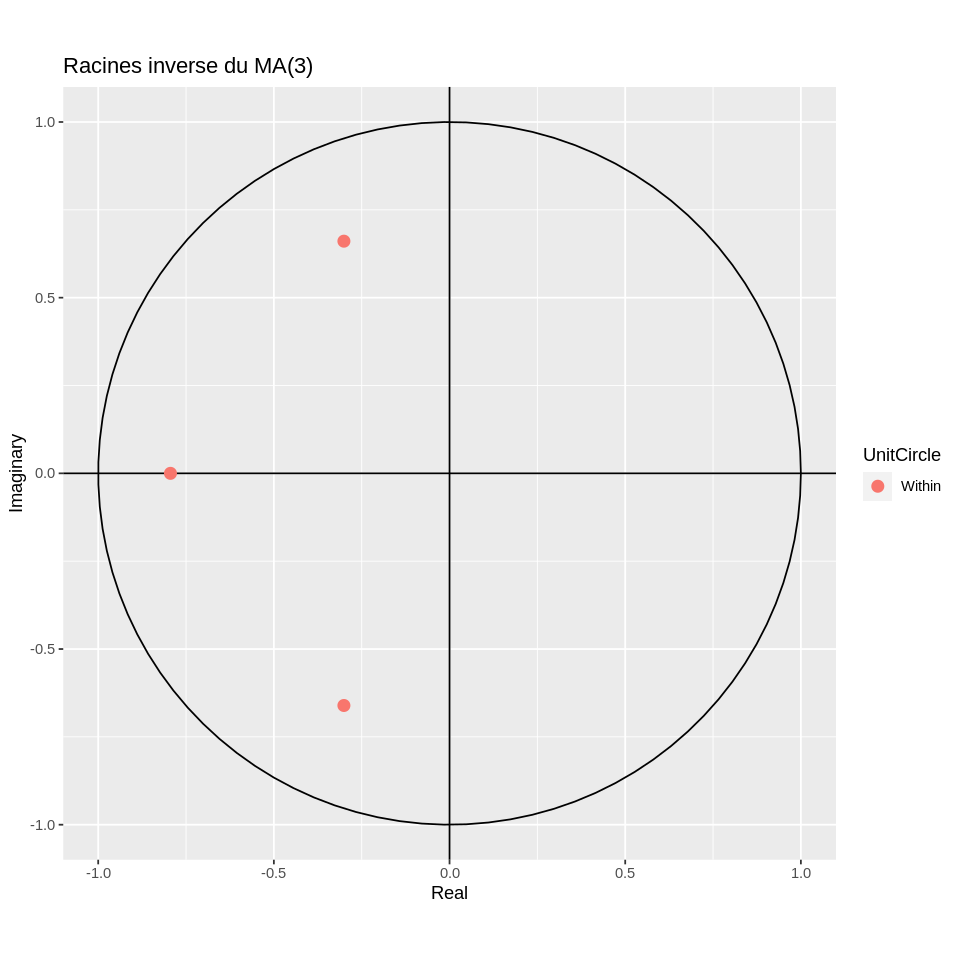

In [ ]:
autoplot(MA3,main="Racines inverse du MA(3)")

Les trois racines sont bien à l'intérieur du cercle de module 1 : la condition d'inversibilité est bien vérifiée.


##### <ins>**Test sur les résidus**<ins>



###### <ins>Test de Ljung-Box : test d'absence d'autocorrélation des résidus<ins>


	Ljung-Box test

data:  Residuals from ARIMA(0,0,3) with non-zero mean
Q* = 4.332, df = 7, p-value = 0.7408

Model df: 3.   Total lags used: 10



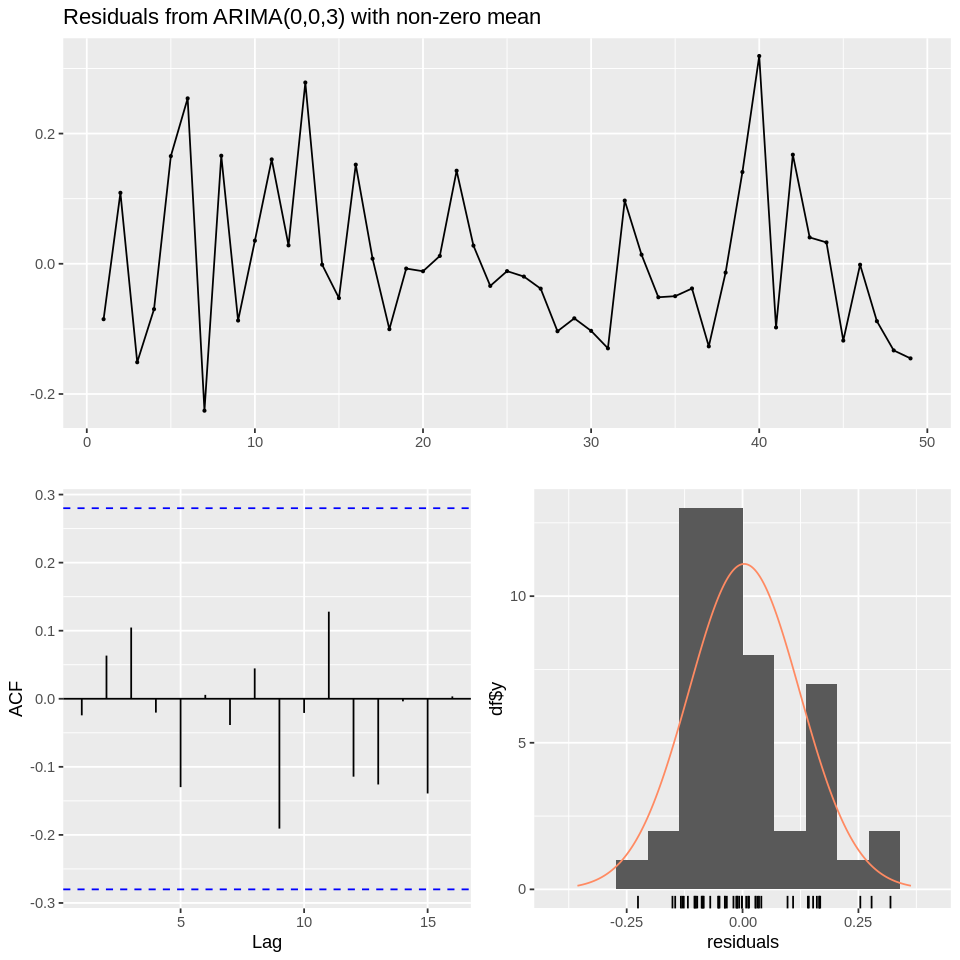

In [ ]:
test_resMA3<-checkresiduals(MA3,lag = 10)

**Commentaire**

1. L'autocorrélogramme montre qu'aucune autocorrélation n'est significativement différente de 0 au seuil de 95%.

2. La statistique de test de Ljung-Box est égale à $Q*(10) = 4.332$.
    + Sous $H_{0}$, $LB\_stat$ suit une loi $\chi^{2}(10-3) = \chi^{2}(7)$.
    + Les seuils critiques sont donc tirés de la loi $\chi^{2}(7)$ :
        + $Q^{*}(10)_{0.90}=12.02$ pour un risque de première espèce de 10%
        + $Q^{*}(10)_{0.95}=14.067$ pour un risque de première espèce de 5%
        + $Q^{*}(10)_{0.99}= 18.48$ pour un risque de première espèce de 1%
    + $Q*(10) = 4.332$  est bien inférieure aux seuils critiques. On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus pour des risques de première espèce de 1% , 5% et 10%. Par ailleurs, la probabilité critique, égale à 0.7408 est supérieure à ces seuils.
    + On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus aux seuils habituels : les résidus ne sont pas autocorrélés.


###### <ins>Test de Jarque et Bera : test de l'hypothèse de normalité des résidus<ins>

In [ ]:
library(moments)
sprintf("Skewness des residus : %f",skewness(MA3$residuals))
sprintf("kurtosis des residus : %f",kurtosis(MA3$residuals))

[1] "Skewness des residus : 0.718271"

[1] "kurtosis des residus : 3.032538"

* Le skewness estimé est environ égal à 0 : il y a une symétrie autour de l'origine.
* Le kurtosis estimé est environ égal à 3 : cela peut indiquer une distribution gaussienne mais nous ne tirons pas de conclusions.

In [ ]:
library(tseries)
jarque.bera.test(MA3$residuals)


	Jarque Bera Test

data:  MA3$residuals
X-squared = 4.2154, df = 2, p-value = 0.1215


* La statistique du test de Jarque et Bera est égale à  est JB\_stat = 4.2154.
* Sous $H_{0}$, LB\_stat suit une loi $\chi^{2}(2)$.
* Les seuils critiques sont :
    + $\chi^{2}_{0.90}(2)=4.61$ pour un risque de première espèce de 10%
    + $\chi^{2}_{0.95}(2)=5.99$ pour un risque de première espèce de 5%
    + $\chi^{2}_{0.99}(2)=9.21$ pour un risque de première espèce de 1%
    
* JB\_stat = 4.2154 est inférieure aux seuils critiques pour des risques de première espèce de 1%, 5% et 10\%. De plus la probabilité critique, égale à 0.1215, est bien supérieure aux seuils habtituels : on ne rejette pas l'hypothèse nulle de normalité à ces seuils, les résidus sont donc bien normalement distribués.

###### <ins>Test de Engle Granger : test d'absence d'effets ARCH<ins>

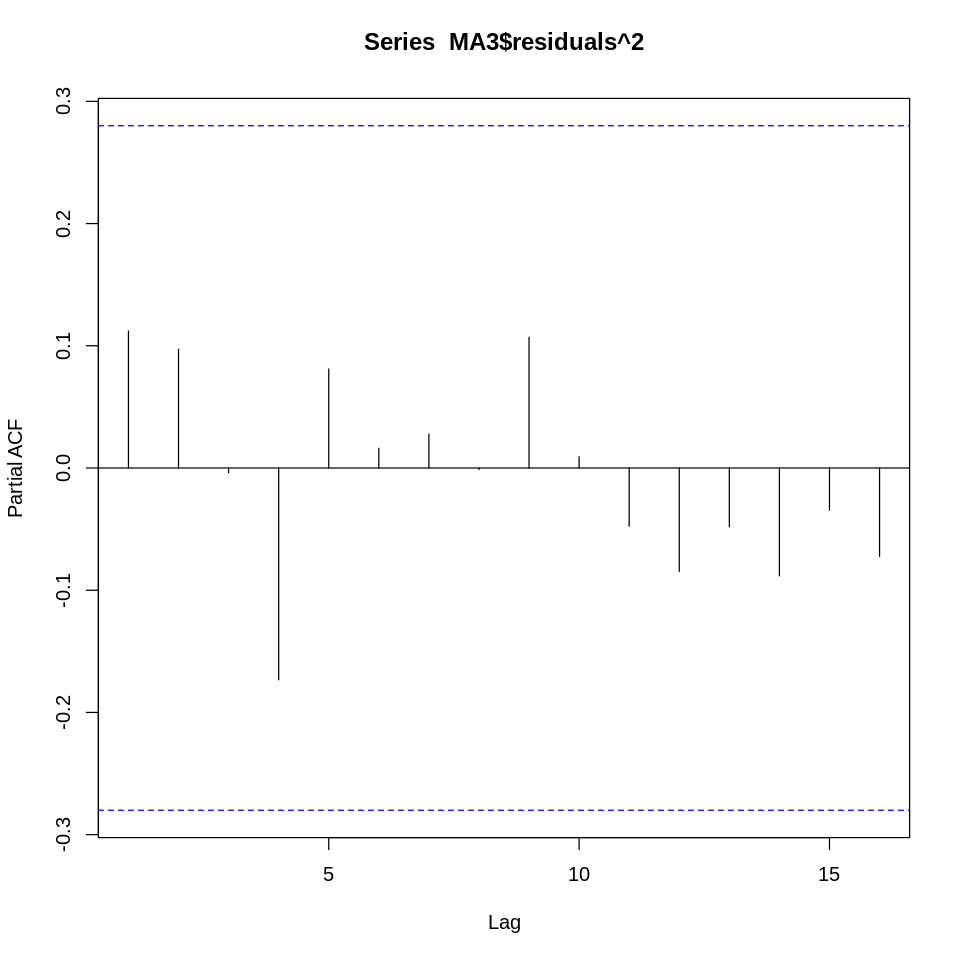

In [ ]:
pacf(MA3$residuals^2)

Nous n'observons à priori aucune autocorrélation partielle significative, cela peut laisser penser que nous n'avons pas d'effet ARCH,  nous testerons à présent cela.

In [ ]:
library(FinTS)
ArchTest(MA3$residuals,lags=4,demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  MA3$residuals
Chi-squared = 2.4356, df = 4, p-value = 0.6562


* La statistique de test est $ARCH\_LM = 2.4356$.
* Sous $H_{0}$, $LB\_stat$ suit une loi $\chi^{2}(2)$. Les seuils critiques sont :
    + $\chi^{2}_{0.90}(4)=4.61$ pour un risque de première espèce de 10%
    + $\chi^{2}_{0.95}(4)=5.99$ pour un risque de première espèce de 5%
    + $\chi^{2}_{0.99}(4)=9.21$ pour un risque de première espèce de 1%
*  ARCH\_LM = 2.4356 est inférieure aux seuils critiques : on ne rejette pas l'hypothèse nulle d'absence d'effet ARCH pour les résidus aux seuils habituels (1%, 5% et 10%).
Ceci est conforté par la probabilité critique (0.6562) qui est bien supérieure aux seuils. On conclut au non rejet de l'hypothèse nulle d'absence d'effet ARCH, ceci signifie que les résidus sont homoscédastiques.  

**<ins>*Conclusion des tests sur les résidus du MA(3)*<ins>** :

Suite aux trois tests, nous arrivons aux conclusions suivantes : les résidus du MA(3) ne sont pas autocorrélés et sont homoscédastiques. Par ailleurs, ils sont bien normalement distribués.

L'hypothèse de normalité des résidus est bien respectée cette fois-ci tandis qu'elle ne l'était pas dans le cas de l'AR(1).

En sachant que les deux autres hypothèses (absence d'autocorrélation et d'effets ARCH) sont valides pour les deux modèles, il devient possible de départager l'AR du MA en se basant sur le critère de normalité de la distribution des résidus.

L'hypothèse de normalité, vérifiée par le test de Jarque et Bara dans le cas du MA(3), est primordiale dans la mesure où elle permet de construire des intervalles de confiance et de prévision lorsque le nombre d'observation est petit, ce qui est notre cas pour t allant de 1 à 49 en retirant les 3 dernières données.

C'est pourquoi nous préférons le modèle MA(3) au modèle AR(1) pour la suite de notre étude.

Maintenant que nous avons tranché, nous allons enfin vérifier que le modèle retenu est bien satisfaisant en opérant un test de significativité de la constante et des coefficients.

##### <ins>**Estimation de spécifications alternatives**<ins>  

Maintenant que nous avons retenu le MA(3), il convient de vérifier s'il ne manque aucun retard.

Pour ce faire, nous allons d'abord tester la significativité du quatrième coefficient d'un MA(3+1)=MA(4).

Nous rappelons que les hypothèses du test sont :

$$\left\lbrace\begin{array}{l}
H_{0}\,:\,coefficient_{i}=0\\
H_{a}\,:\,coefficient_{i} \neq 0
\end{array} \right.$$

Et que les seuils critiques sont :
*       seuil = 2.57 pour un risque de première espèce égal à 1\%
*       seuil = 1.96 pour un risque de première espèce égal à 5\%



In [ ]:
library(forecast)
MA4<-Arima(y = data_chômagelog$chômage[1:49],order=c(0,0,4))
summary(MA4)
library(lmtest)
coeftest(MA4)

Series: data_chômagelog$chômage[1:49] 
ARIMA(0,0,4) with non-zero mean 

Coefficients:
         ma1     ma2     ma3     ma4     mean
      1.3935  1.0032  0.4382  0.0234  -2.8264
s.e.  0.1570  0.2469  0.2405  0.2259   0.0641

sigma^2 = 0.01572:  log likelihood = 33.81
AIC=-55.63   AICc=-53.63   BIC=-44.28

Training set error measures:
                      ME      RMSE        MAE        MPE     MAPE      MASE
Training set 0.003518887 0.1188013 0.09281426 -0.3267119 3.411918 0.7774809
                    ACF1
Training set -0.02509357


z test of coefficients:

           Estimate Std. Error  z value  Pr(>|z|)    
ma1        1.393510   0.156988   8.8765 < 2.2e-16 ***
ma2        1.003249   0.246868   4.0639 4.826e-05 ***
ma3        0.438162   0.240531   1.8216   0.06851 .  
ma4        0.023380   0.225888   0.1035   0.91756    
intercept -2.826399   0.064141 -44.0653 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



+ $\vert t_{\hat{\theta}_{4}} \vert$  = 0.1035 < 1,96 < 2,57 : le coefficient du 4ème retard n'est donc pas significativement différent de 0, aux seuils de 5 et 1% respectivement.

Nous ajoutons maintenant un retard à la partie AR de l'ARMA par souci de vérification.

In [ ]:
library(forecast)
ARMA13<-Arima(y = data_chômagelog$chômage[1:49],order=c(1,0,3))
summary(ARMA13)
library(lmtest)
coeftest(ARMA13)

Series: data_chômagelog$chômage[1:49] 
ARIMA(1,0,3) with non-zero mean 

Coefficients:
         ar1     ma1     ma2     ma3     mean
      0.3400  1.0402  0.5510  0.2259  -2.8297
s.e.  0.4694  0.5048  0.6171  0.2720   0.0710

sigma^2 = 0.01571:  log likelihood = 33.89
AIC=-55.77   AICc=-53.77   BIC=-44.42

Training set error measures:
                      ME      RMSE        MAE        MPE     MAPE      MASE
Training set 0.003459081 0.1187696 0.09349108 -0.3137865 3.438449 0.7831505
                    ACF1
Training set -0.02471895


z test of coefficients:

           Estimate Std. Error  z value Pr(>|z|)    
ar1        0.339988   0.469351   0.7244  0.46883    
ma1        1.040166   0.504819   2.0605  0.03935 *  
ma2        0.550977   0.617116   0.8928  0.37195    
ma3        0.225920   0.271965   0.8307  0.40615    
intercept -2.829744   0.071044 -39.8311  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


$\vert t_{\hat{\phi}_{1}} \vert$  = 0.7244 < 1,96 < 2,57

Le coefficient du 1er retard de la partie AR n'est donc pas significativement différent de 0, aux seuils de 5 et 1% respectivement.

<ins>**Conclusion finale** : <ins>   

Nous aboutissons à un modèle MA(3) dont les résidus sont non autocorrélés, homoscédastiques et distribués noramelement.
Le modèle peut s'écrire comme suit :

$$CH_{\text{t}}  = -2.826062 + {\hat{\epsilon}}_{\text{t}} + 1.395622{\hat{\epsilon}}_{\text{t-1}} + 1.004631{\hat{\epsilon}}_{\text{t-2}} + 0.418622{\hat{\epsilon}}_{\text{t-3}}$$    

## IV - Prévisions

Nous commencerons d'abord par prévoir le processus filtré sur la base du modèle MA(3) estimé et validé précédemment. Puis nous construirons, sur la base des prévisions du modèle filtré, les prévisions du modèle initial.


### Calcul des prévisions et représentations graphiques du chômage pour la série filtrée (de 2018 à 2021)<ins>


Nous choisissons un horizon de 3 ans, nous calculerons les prévisions à partir de l'année 2018, donc de 2018 à 2021 ainsi que leur intervalle de confiance à 95%.

   Point Forecast     Lo 95     Hi 95
50      -3.199496 -3.442385 -2.956607
51      -3.027769 -3.444786 -2.610752
52      -2.886898 -3.370061 -2.403736

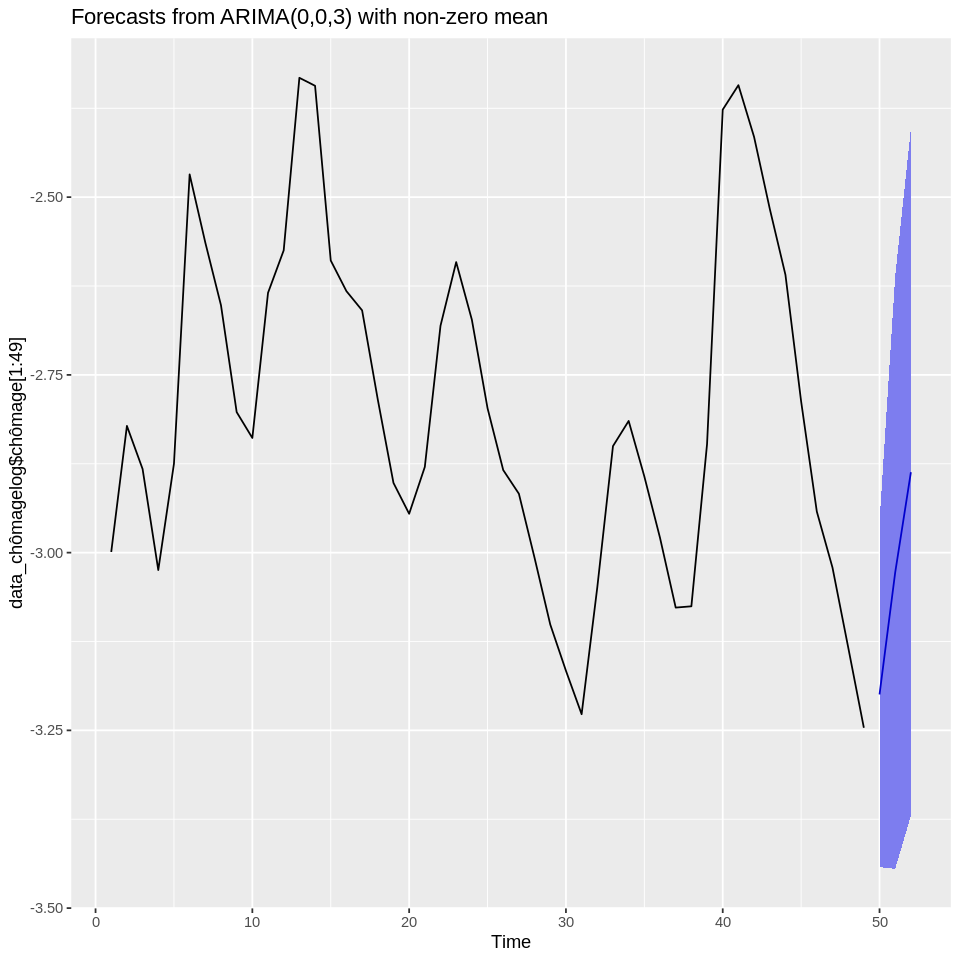

In [ ]:
library(forecast)
forecast_MA3<-forecast(MA3,h=3,level=95)
forecast_MA3
autoplot(forecast_MA3)

On peut maintenant calculer les prévisions manuellement. Pour cela, on affiche les résidus pour pouvoir calculer les prévisions :

In [ ]:
residuals_table <- data.frame(Base$Dates[1:48], MA3$residuals[1:48])

**Calcul de la prévision pour 2018 (h=1)**

Les prévisions du de  taux de chômage vont dépendre uniquement des trois dernières observations passées.

$$
\begin{aligned}
CH_{2018}^{a}(1) &= -2,826062 + {\hat{\epsilon}}_{\text{2018}} + 1.395622\times  {\hat{\epsilon}}_{\text{2017}}+1.004631\times \ {\hat{\epsilon}}_{\text{2016}} +0.418622\times {\hat{\epsilon}}_{\text{2015}}
\end{aligned}
$$

$$
\begin{aligned}
CH_{2018}^{a}(1) &= -2,826062 + 0 + 1.395622\times  (-0.133077151)+1.004631\times \ (-0.088199400) +0.418622\times (-0.001463854)\\
\end{aligned}
$$

$$
\begin{aligned}
CH_{2018}^{a}(1) &= -3,1
\end{aligned}
$$

**Calcul de la prévision pour 2019 (h=2)**


$$
\begin{aligned}
CH_{2019}^{a}(2) &= -2,826062 + {\hat{\epsilon}}_{\text{2019}} + 1.395622\times  {\hat{\epsilon}}_{\text{2018}}+1.004631\times \ {\hat{\epsilon}}_{\text{2017}} +0.418622\times {\hat{\epsilon}}_{\text{2016}}
\end{aligned}
$$

$$
\begin{aligned}
CH_{2019}^{a}(2) &= -2,826062 + 0 + 1.395622\times 0
+1.004631\times (-0.133077151) +0.418622\times (-0.088199400)\\
\end{aligned}
$$

$$
\begin{aligned}
CH_{2019}^{a}(2) &= -2,99
\end{aligned}
$$

**Calcul de la prévision pour 2020 (h=3)**

$$
\begin{aligned}
CH_{2020}^{a}(3) &= -2,826062 + {\hat{\epsilon}}_{\text{2020}} + 1.395622\times  {\hat{\epsilon}}_{\text{2019}}+1.004631\times \ {\hat{\epsilon}}_{\text{2018}} +0.418622\times {\hat{\epsilon}}_{\text{2017}}
\end{aligned}
$$

$$
\begin{aligned}
CH_{2020}^{a}(3) &= -2,826062 + 0 + 1.395622\times 0
+1.004631\times 0 +0.418622\times (-0.133077151)\\
\end{aligned}
$$

$$
\begin{aligned}
CH_{2019}^{a}(3) &= -2,88
\end{aligned}
$$

On peut maintenant regarder la différence entre les valeurs observéss et prévues graphiquement.

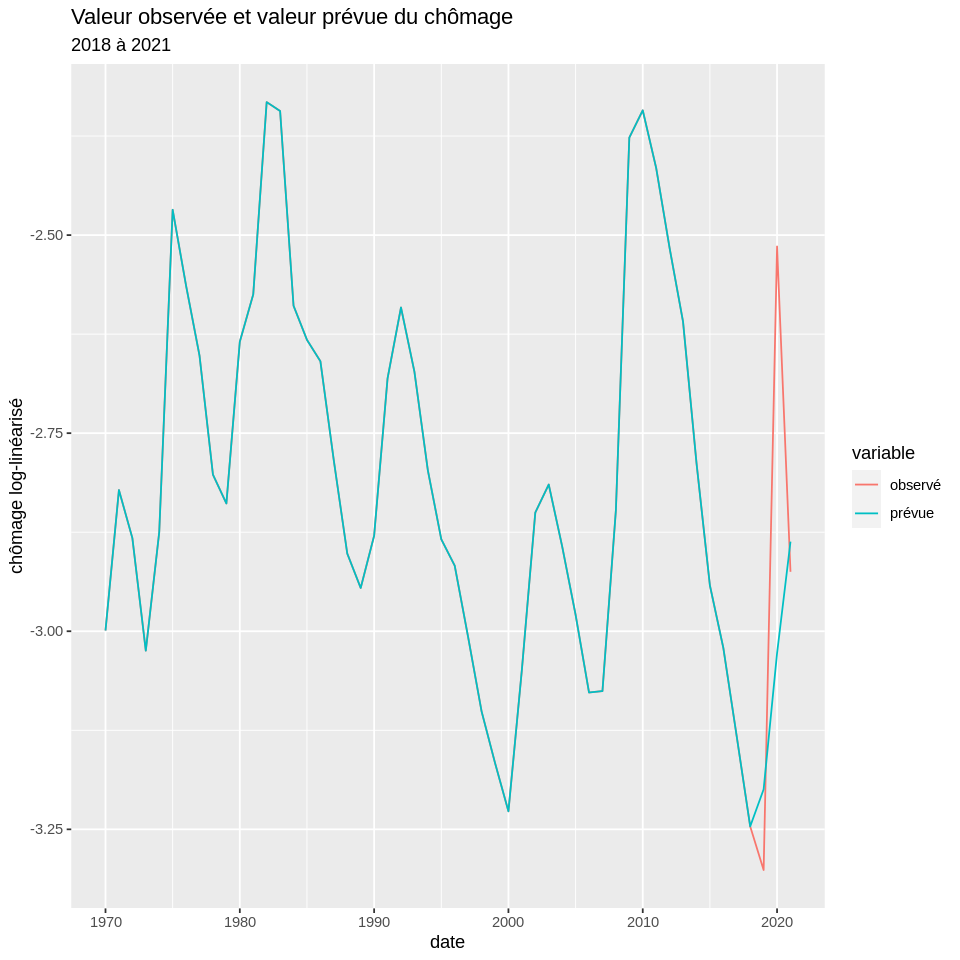

In [ ]:
df_forc<-cbind.data.frame(Base$Dates,data_chômagelog$chômage,c(data_chômagelog$chômage[1:49],as.matrix(forecast_MA3$mean)))

colnames(df_forc)<-c("date","observé","prévue")

data_F_melt=melt(as.data.frame(df_forc),id.vars = 1)

p_g_us<-ggplot(data=data_F_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_g_us+labs(y="chômage log-linéarisé",title = "Valeur observée et valeur prévue du chômage",
            subtitle = "2018 à 2021")

**<ins> Commentaire : <ins>**

On voit que jusqu'en 2020, la prévision est proche de la valeur observée. Ensuite, l'écart se creuse et la valeur observée devient beaucoup plus élevée que la valeur prévue. Cela peut s'expliquer par la crise du COVID-19 qui a entrainé une augmentation fulgurante du chômage, qui n'aurait pas pu être prévue par notre modèle.

# Partie 2 : Modélisation multivariée

Dans cette partie, nous faisons le choix de ne pas prendre en compte la variable de la productivité afin de simplifier notre approche et de mieux coller au modèle d'Aghion et Howitt. En effet, ces derniers, lorsqu'ils parlent de "productivité", font référence à la productivité totale des facteurs. Dans notre cas, nous avons seulement la productivité du travail, ainsi, la prendre en compte pourrait biaiser nos résultats.

La présence de cette variable n'était pas problématique dans la partie 1 car la modélisation univariée se concentre sur une seule variable à la fois contrairement à la modélisation multivariée qui implique l'analyse simultanée de plusieurs séries temporelles.

Création d'un dataframe avec les deux variables :

In [ ]:
df_final <- merge(data_chômagelog, data_dépenses_stat, by = "dates")

In [ ]:
nom_colonnes <- c("Dates","Chômage", "Dépenses")
colnames(df_final) <- nom_colonnes

Etape préliminaire : études des statistiques

In [ ]:
summary(df_final[c("Chômage","Dépenses")])

    Chômage          Dépenses       
 Min.   :-3.301   Min.   :-0.17876  
 1st Qu.:-2.984   1st Qu.:-0.10997  
 Median :-2.843   Median :-0.07037  
 Mean   :-2.807   Mean   : 0.00000  
 3rd Qu.:-2.627   3rd Qu.: 0.10014  
 Max.   :-2.332   Max.   : 0.30530  

On voit que la moyenne des dépenses de R&D est nulle mais pas celle du chômage.

## I - Modélisation VAR

### 1.1 Recherche du nombre de retard optimal

Nous commençons par déterminer le nombre de retards par l'application des critères d'information multivariés.

In [ ]:
df_final2 <- df_final[, -1]

In [ ]:
library(vars)
pselect<-VARselect(y=df_final2,lag.max=8,type=c("const"))
pselect$criteria

Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich



,1,2,3,4,5,6,7,8
AIC(n),-9.2809860187,-9.6140173653,-9.581678e+00,-9.539655e+00,-9.512693e+00,-9.373507e+00,-9.274693e+00,-9.2447587192
HQ(n),-9.1907591738,-9.4636392905,-9.371149e+00,-9.268975e+00,-9.181861e+00,-8.982524e+00,-8.823559e+00,-8.7334732648
SC(n),-9.0376874322,-9.2085197212,-9.013982e+00,-8.809759e+00,-8.620598e+00,-8.319213e+00,-8.058201e+00,-7.8660667294
FPE(n),0.0000932187,0.0000669178,6.935817e-05,7.278874e-05,7.552537e-05,8.808599e-05,9.925219e-05,0.0001051483


In [ ]:
pselect$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     2      2      2      2

Nous constatons que le nombre de retards optimal ne varie pas selon le critère : il est tout le temps égal à 2. On décide donc d'estimer le modèle VAR avec 2 retards.

### 1.2 Estimation du modèle VAR

Afin d'estimer le modèle VAR, nous rajoutons une constante car l'une de nos deux séries a n'a pas une moyenne nulle.

In [ ]:
var.2lag <-VAR(y = df_final2,type="const",lag.max = 2)
summary(var.2lag)


VAR Estimation Results:
Endogenous variables: Chômage, Dépenses 
Deterministic variables: const 
Sample size: 50 
Log Likelihood: 112.028 
Roots of the characteristic polynomial:
0.7829 0.7829 0.4512 0.4512
Call:
VAR(y = df_final2, type = "const", lag.max = 2)


Estimation results for equation Chômage: 
Chômage = Chômage.l1 + Dépenses.l1 + Chômage.l2 + Dépenses.l2 + const 

            Estimate Std. Error t value Pr(>|t|)    
Chômage.l1    0.7829     0.1483   5.278 3.62e-06 ***
Dépenses.l1   1.1556     0.5077   2.276  0.02765 *  
Chômage.l2   -0.1153     0.1500  -0.769  0.44612    
Dépenses.l2  -1.1457     0.5269  -2.174  0.03498 *  
const        -0.9408     0.3165  -2.973  0.00473 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.1727 on 45 degrees of freedom
Multiple R-Squared: 0.5633,	Adjusted R-squared: 0.5245 
F-statistic: 14.51 on 4 and 45 DF,  p-value: 1.096e-07 


Estimation results for equation Dépenses: 
Dépenses = Chômage.l1

**Commentaires des résultats**

Chômage.li et Dépenses.li représentent respectivement Chômage et Dépenses avec "i" retards.


**Equation du taux de chômage :**

**Chômage.l1 :** Le coefficient est positif et significatif pour un risque de première espèce de 1%. Le chômage est donc positivement corrélé à sa valeur passée.
**Dépenses.l1 :** Le coefficient est positif et significatif pour un risque de première espèce de 5%. Une augmentation des dépenses de R&D a pour effet d'augmenter le chômage.

**Chômage.l2 :** Le coefficient est négatif et non significatif.
**Dépenses.l2 :** Le coefficient est négatif et significatif pour un risque de première espèce de 5%

**Constante :** la constante est significative pour un risque de première espèce de 1%

Le R2 est égal à 56%, nous le comprarerons au R2 de la régression des dépenses de R&D avant de conclure.

**Equation des dépenses de R&D :**

**Chômage.l1 :** Le coefficient est négatif et non significatif.
**Dépenses.l1 :** Le coefficient est positif et significatif pour un risque de première espèce de 1%. Les dépenses de R&D sont donc positivement corrélées à leurs valeur passées.

**Chômage.l2 :** Le coefficient est positif et non significatif.
**Dépenses.l2 :** Le coefficient est négatif et significatif pour un risque de première espèce de 1%.

**Constante :** La constante n'est pas significative.

Le R2 étant égal à 93% ( < 56% ), il en découle que le pouvoir explicatif de la régression est plus important que pour les dépenses de R&D.

### 1.3 Etude de la stationnarité du VAR

Nous nous intéressons maintenant à la stationnarité du VAR.

La fonction "roots" renvoie les modules des inverses des racines du polynôme caractéristique.

In [ ]:
roots(var.2lag)

[1] 0.7828735 0.7828735 0.4512316 0.4512316

Les inverses des racines étant de module strictement inférieur à 1, la condition de stationnarité est donc bien satisfaite.

### 1.4 Etude de l'autocorrélation des résidus du VAR

Nous souhaitons vérifier que les résidus ne présentent pas d'autocorrélation.

In [ ]:
serial.test(var.2lag, lags.pt = 10, type = "PT.adjusted")


	Portmanteau Test (adjusted)

data:  Residuals of VAR object var.2lag
Chi-squared = 15.758, df = 32, p-value = 0.9928

$serial

	Portmanteau Test (adjusted)

data:  Residuals of VAR object var.2lag
Chi-squared = 15.758, df = 32, p-value = 0.9928



La p-value est égale à  0.9928, elle est bien supérieure à 0.05. Nous pouvons donc dire que les résidus ne sont pas autocorrélés.

## II - Test de causalité au sens de Granger


Le test de causalité de Granger est utilisé pour déterminé si une variable temporelle en cause une autre. Dans notre cas, il s'agit de voir si le chômage cause, au sens de Granger, les dépenses de R&D (respectivement si les dépenses de R&D causent le chômage, au sens de Granger).

Concrètement, le test nous permettra de voir si le fait d'inclure l'information passée du chômage (respctivement les dépenses de R&D) améliore la modélisation des dépenses de R&D (respct. chômage) par rapport au modèle initial qui n'en tient pas compte.

### 2.1 Causalité du chômage sur les dépenses de R&D

Nous commençons dans un premier temps par étudier la causalité de sens de Granger du chômage sur les dépenses de R&D.

Les hypothèses du test s'écrivent donc comme suit :

$\begin{align*}
H_0 &: a_{12}^{1}=0\Rightarrow \text{Chômage ne cause pas les dépenses de R&D} \\
H_1 &:a_{12}^{1}\neq 0 \Rightarrow \text{Chômage cause les dépenses de R&D}
\end{align*}$

In [ ]:
causality(var.2lag,cause=c('Chômage'))

$Granger

	Granger causality H0: Chômage do not Granger-cause Dépenses

data:  VAR object var.2lag
F-Test = 1.7224, df1 = 2, df2 = 90, p-value = 0.1845


$Instant

	H0: No instantaneous causality between: Chômage and Dépenses

data:  VAR object var.2lag
Chi-squared = 0.11598, df = 1, p-value = 0.7334



Les seuils critiques sont tirés d'une loi $F(2,45)$ :

| $\alpha$                  | 5\%  | 1\% |
|---------------------------|------|------|
| $f_{1-\alpha}(1,+\infty)$ | 3,23 | 5,18|

La statistique de test, égale à 1.7224, est inférieure au seuil critique pour $\alpha=1\%$. Par ailleurs, la probabilité critique est égale à 0.18 et est donc supérieure aux seuils utilisés. Ceci conforte notre décision de ne pas rejetter l'hypothèse nulle d'absence de causalité du chômage sur les dépenses de R&D aux seuils de 1% et 5%. Autrement dit, le chômage ne cause pas les dépenses de R&D au sens de Granger, aux seuils de 1% et 5%.


### 2.2 Causalité des dépenses de R&D sur le chômage

Nous nous intéressons maintenant à la causalité de Granger des dépenses de R&D sur le chômage.

Les hypothèses testées s'écrivent alors  :

$\begin{align*}
H_0 &: a_{12}^{1}=0\Rightarrow \text{Dépenses de R&D ne causent pas chômage} \\
H_1 &:a_{12}^{1}\neq 0 \ \Rightarrow \text{Dépenses de R&D causent chômage}
\end{align*}$

In [ ]:
causality(var.2lag,cause=c('Dépenses'))

$Granger

	Granger causality H0: Dépenses do not Granger-cause Chômage

data:  VAR object var.2lag
F-Test = 2.5975, df1 = 2, df2 = 90, p-value = 0.08004


$Instant

	H0: No instantaneous causality between: Dépenses and Chômage

data:  VAR object var.2lag
Chi-squared = 0.11598, df = 1, p-value = 0.7334



Les seuils critiques sont également tirés d'une loi $F(2,45)$ :

| $\alpha$                  | 5\%  | 1\% |
|---------------------------|------|------|
| $f_{1-\alpha}(1,+\infty)$ | 3,23 | 5,18|

La statistique de test, égale à 2.3144, est inférieure au seuil critique pour $\alpha=1\%$. Nous décidons de ne pas rejetter l'hypothèse nulle d'absence de causalité des dépenses dd R&D sur le chômage aux seuils de 1% et 5%. Cette décision est confortée par la probabilité critique qui est égale à $0,06$ et qui est donc supérieure aux seuils de 1% et 5%.


Nous pouvons tout de même noter que la p-value est nettement plus faible que dans le test de la causalité du chômage sur les dépenses de R&D (6% vs 18%). Cela peut, peut-être, indiquer que si causalité il y avait, elle aurait plutôt été dans le sens des dépenses de R&D sur le chômage et non l'inverse. Nous ne tirons aucune conlusion concernant ce point en particulier, mais ce constat nous sera utile dans partie qui suit afin de classer nos variables.

## III - Fonctions impulsion-réponse

Malgré le fait qu'aucune des deux variables du VAR ne cause l'autre au sens de Granger, nous pouvons dégager un ordre de classement.

En effet, comme amorcé à la fin de la partie précédente, si nous regardons les p-values des tests de Granger, nous constatons que la causalité des dépenses de R&D sur le chômage est tout de même significative pour un risque de 10%. De plus, la théorie d'Aghion et Howitt stipule que c'est bien l'augmentation des dépenses de R&D qui entraine la potentielle création d'innovations, elle-même déstructrice d'emplois.

Nous pouvons ainsi raisonnablement penser que les chocs sur les dépenses de R&D  impactent instantanément le chômage plutôt que l'inverse. C'est pour cela que nous décidons de "placer" les dépenses de R&D en première ligne et, par conséquent, le chômage en seconde position dans la VAR.

In [ ]:
var.1lag <-VAR(y = df_final2[,c("Dépenses","Chômage")],type="const",lag.max = 2)

### 3.1 Estimation des IRF par la méthode des VAR

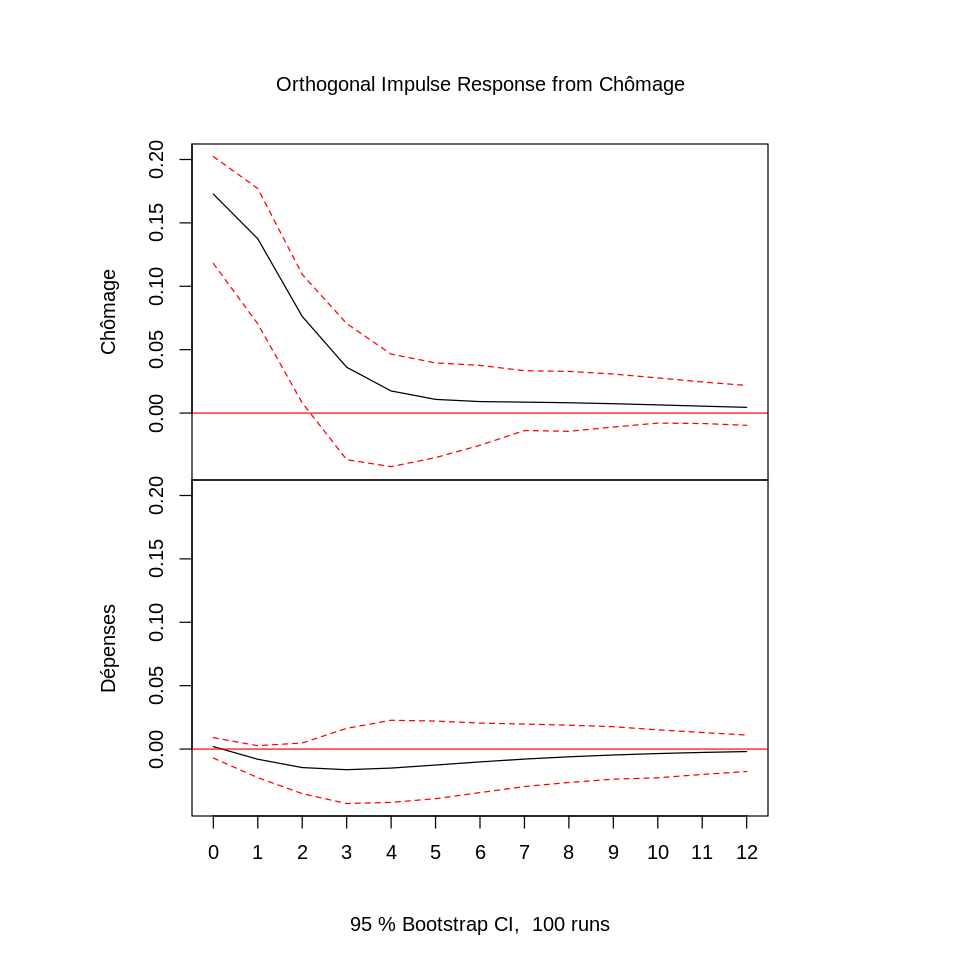

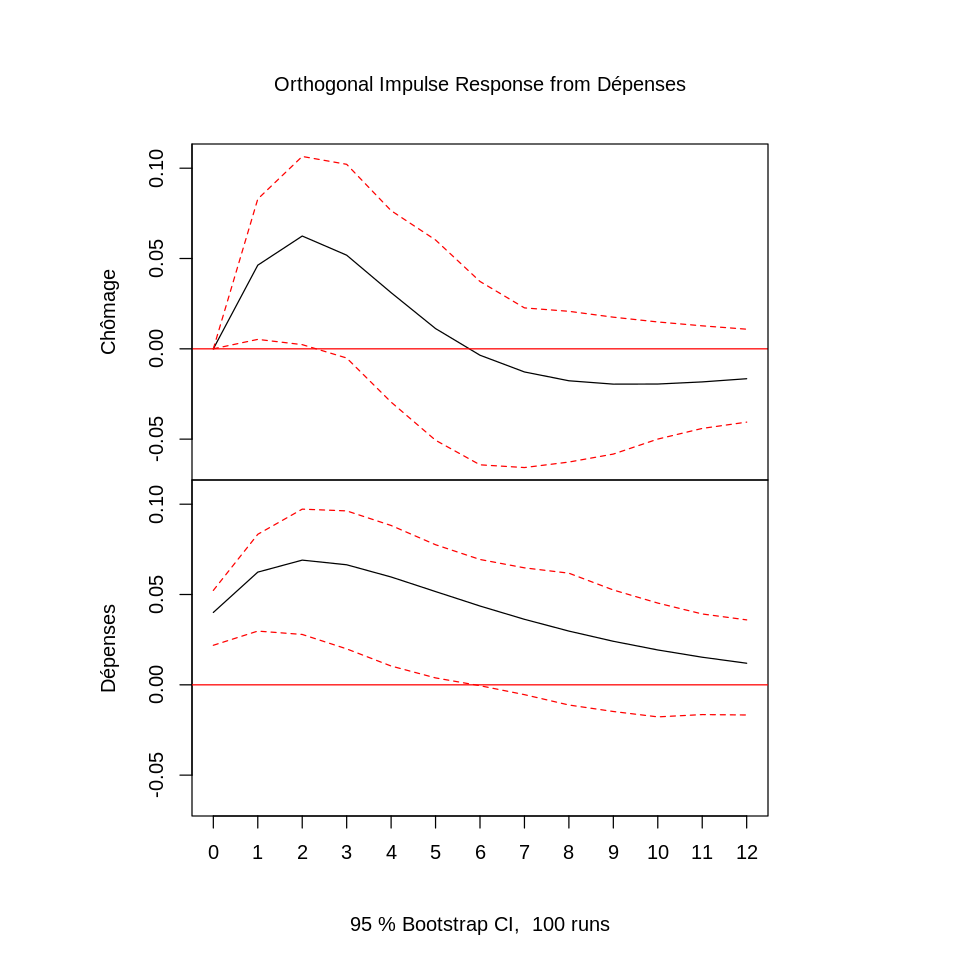

In [ ]:
irf<-irf(var.2lag,n.ahead = 12,ortho = TRUE,ci=0.95)
plot(irf)

Comme toutes les IRF convergent vers 0, nous confirmons la stationnarité des variables chômage et dépenses de R&D.

Nous voyons que :

- Un choc sur le chômage admet un effet positif sur le chômage lui-même qui décroît fortement et disparait presque totalement au bout de 6 ans. En effet, lorsqu'un choc sur le chômage survient en période de crise par exemple, cela peut être à l'origine d'une vague de découragement parmi les travailleurs. Certains peuvent même cesser d'être à la recherche active d'un emploi en raison des perspectives réduites. Nous pouvons penser que les effets d'un tel choc tendent à décroître par la mise en place de politiques visant la réinsertion à l'emploi telles que le New Deal pendant la grande dépression (à la suite de la crise de 1929) et plus précisement le Civilian Conservation Corps qui avait pour objectif d'accorder du travail aux jeunes chômeurs répondant à certains critères.

- Un choc sur chômage admet un effet négatif relativement faible sur les dépenses de R&D qui décroissent à partir de la 4ème année. Le choc sur le chômage pourrait entraîner une période initiale d'incertitude économique, amenant les entreprises à réduire leurs dépenses de R&D, notamment si la stabilité financière à court terme est menacée. En effet, sous ces conditions, elles pourraient être moins enclines à investir dans des activités de R&D à long terme.

- Un choc sur les dépenses de R&D a un effet positif sur le chômage, puis au bout de 6 ans, les effets de ce choc deviennent négatifs. En effet, d'après les théories économiques, les dépenses de R&D et donc les potentielles innovations créées, peuvent détruire des emplois (ex : les luddistes - aux XIXème siècle - qui avaient tenté de détruire les métiers à tisser mécaniques et qui ont été accusés de les mettre au chômage). Néanmoins, à mesure qu'elles se répandent elles peuvent créer de nouvelles professions qui debouchent sur des besoins en main d'oeuvre importants (exemple des nouveaux métiers crées avec le developpement de l'IA). Egalement, on aurait pu dire que le chômage tend à remonter du fait de la potentielle précense de politiques visant à sauvegarder les emplois détruits à l'issus d'innovation.

- Enfin, un choc sur les dépenses de R&D a un effet positif sur les dépenses de R&D elles-mêmes, dont les effets décroissent lentement à partir de la 3ème année. Les premières années suivant le choc peuvent être marquées par la concrétisation des résultats de recherche, comme le développement de nouveaux produits ou l'amélioration de processus dékà existants, ce qui peut entraîner une augmentation des dépenses de R&D. Néanmoins, la mise en place des premières innovations affaiblie les chances de réalisation des prochaines. En effet, les innovations qui pourraient éventuellement suivre sont, par essence, plus complexes ou simplement plus gourmandes en investissements que les premières, tout cela pour des rendements marginaux moindres. Ce phénomène contribue à démotiver les entreprises et entraine ainsi une réduction des dépenses de R&D.


### 3.2 Estimation des IRF par la méthode des projections locales

[[1]]
NULL


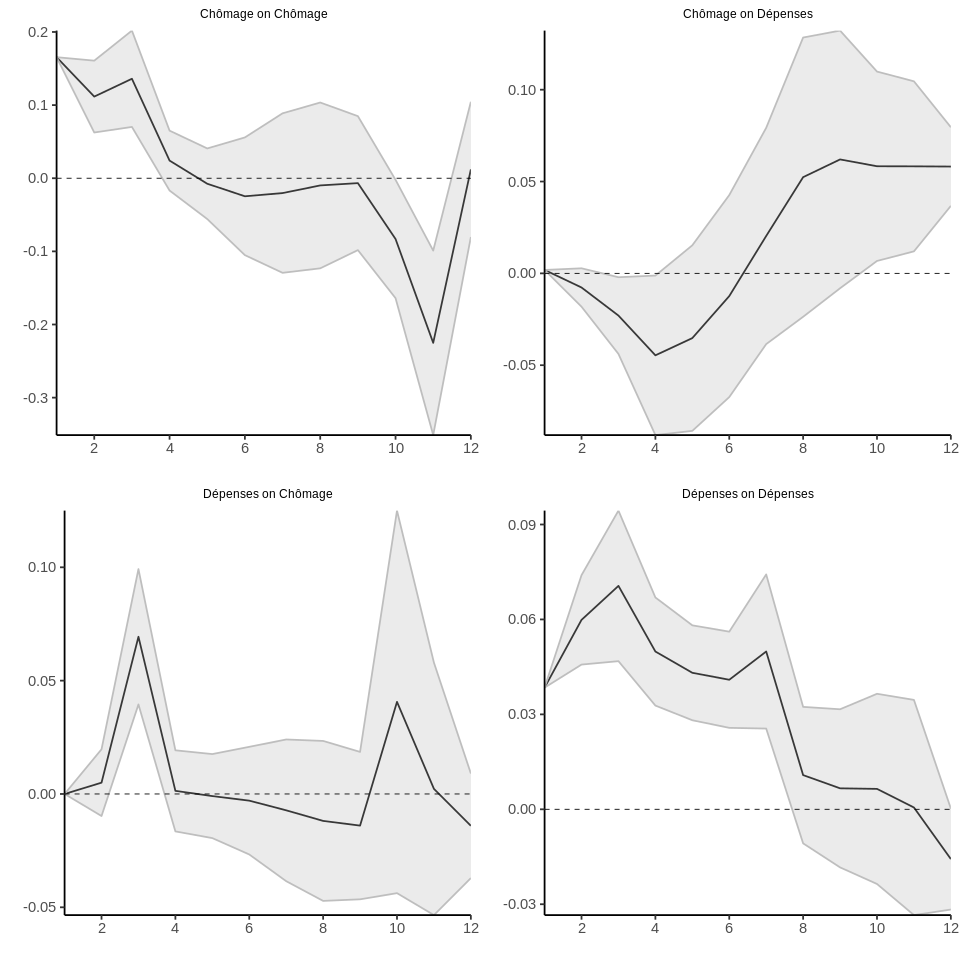

In [ ]:
library(lpirfs)
irf_LP <-lp_lin(endog_data = df_final2,
                    lags_endog_lin = NaN,
                    lags_criterion = 'BIC',
                    max_lags = 8,
                    trend = 0,
                    shock_type = 0,
                    confint=1.96,
                    hor=12,
                    adjust_se=TRUE)

plot(irf_LP)

Nous observons que :

- Les effets du choc du chômage sur le chômage lui-même deviennent largement négatifs à partir de la 8ème année, ce qui n'était pas le cas lorsque nous avons estimé les IRF par la méthode des VAR.

- Les effets du choc du chômage sur les dépenses de R&D sont très également amplifiés : à partir de la 6ème année, ils deviennent fortement positifs et constants jusqu'à l'année 12, sans décroître. Nous notons que par la méthode des VAR, les effets devennaient quasiment nuls au bout de la 6ème année.

- Les effets du choc des dépenses de R&D sur les dépenses de R&D elles-mêmes sont quasiment identiques à ceux constatés par la méthode des VAR.

- Les effets du choc des dépenses de R&D sur le chômage sont égaleement similaires entre les deux méthodes, nous soulignons toutefois qu'avec la méthode des projections locales, les effets redeviennent positifs au bout de la 10ème année.

Au vu des différences notables entre les conclusions tirées, nous pouvons penser que notre modèle VAR n'est pas le bon.


## IV - La cointégration de Johansen

Dans notre cas, nous ne pouvons hélas pas faire le test de cointégration car nous n'avons pas deux variables $I(1)$.

## Conclusion


Nous avons entamé ce projet en ayant en tête l'idée de confirmer la théorie destruction-création d'Aghion et Howwitt (1992). Pour ce faire, nous avons utilisé les outils économétriques mis à notre disposition, notamment afin d'explorer au mieux les relations qui lient chômage et dépenses de R&D. Notre étude nous a confronté à des résultats pour le moins intéressants et surtout, inattendus.

En effet, alors que la théorie stipule que les dépenses de R&D exercent un impact sur le chômage, le test de causalité nous pousse à conclure à l'absence de causalité entre nos deux variables au sens de Granger. Ainsi, une augmentation des dépenses de R&D, et donc une potentielle augmentation des innovations ne cause pas "à la Granger" une destruction des emplois et donc du chômage.

Néanmoins, on ne peut pas conclure qu'il n'y a aucune relation entre nos deux variables. Si on s'intéresse aux fonctions impulsion-réponse, on se rend compte qu'il existe bien un impact entre les variables. D'un côté nous pouvons dire que les estimations de ces dernières vont dans le sens de la théorie d'Aghion et Howitt car elles suggèrent bien une influence des dépenses de R&D sur le chômage, qui réagit fortement et presque instantanément après un choc sur les dépenses de R&D.

D'un autre côté, les fonctions impulsion-réponse mettent en lumière des réactions variables selon la méthode appliquée. En effet, en employant la méthode des projections locales, nous aboutissons à des différences notables de "degré" par rapport à la méthode VAR traditionnelle. Ainsi, nous ne questionnons pas tant l'existence de l'influence que son étendue.

De cela, nous retenons que, bien que le modèle d'Aghion et Howitt fournisse un cadre conceptuel solide, il est nécessaire de considérer d'autres approches, et notamment un autre modèle que le VAR qui donne des résultats qui semblent insuffisants. Il pourrait également être intéressant de se pencher sur les réponses de la part des gouvernements et dans quelle mesure ces derniers peuvent assurer la compétitivité, qui permet les innovations tout en protégeant les salariés et en limitant l'impact sur ce chômage dit "technologique".

